In [ ]:
# !unzip mmwave-data.zip

In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp
import warnings
warnings.filterwarnings('ignore')

# Data Load

## Small Scale Fading Data 

In [4]:
def SSF_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9


######################
#### LOAD PATH AB ####
######################
SSF_pathAB_dB = pd.DataFrame()
SSF_pathAB_dB['AP1'], SSF_pathAB_dB['AP2'], SSF_pathAB_dB['AP3'],\
 SSF_pathAB_dB['AP4'], SSF_pathAB_dB['AP5'], SSF_pathAB_dB['AP6'],\
  SSF_pathAB_dB['AP7'], SSF_pathAB_dB['AP8'], SSF_pathAB_dB['AP9'] = SSF_mmdata_dB('AB')

SSF_pathAB_linear = pd.DataFrame()
SSF_pathAB_linear['AP1'], SSF_pathAB_linear['AP2'], SSF_pathAB_linear['AP3'],\
 SSF_pathAB_linear['AP4'], SSF_pathAB_linear['AP5'], SSF_pathAB_linear['AP6'],\
  SSF_pathAB_linear['AP7'], SSF_pathAB_linear['AP8'], SSF_pathAB_linear['AP9'] = SSF_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
SSF_pathBA_dB = pd.DataFrame()
SSF_pathBA_dB['AP1'], SSF_pathBA_dB['AP2'], SSF_pathBA_dB['AP3'],\
 SSF_pathBA_dB['AP4'], SSF_pathBA_dB['AP5'], SSF_pathBA_dB['AP6'],\
  SSF_pathBA_dB['AP7'], SSF_pathBA_dB['AP8'], SSF_pathBA_dB['AP9'] = SSF_mmdata_dB('BA')

SSF_pathBA_linear = pd.DataFrame()
SSF_pathBA_linear['AP1'], SSF_pathBA_linear['AP2'], SSF_pathBA_linear['AP3'],\
 SSF_pathBA_linear['AP4'], SSF_pathBA_linear['AP5'], SSF_pathBA_linear['AP6'],\
  SSF_pathBA_linear['AP7'], SSF_pathBA_linear['AP8'], SSF_pathBA_linear['AP9'] = SSF_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(SSF_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(SSF_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(SSF_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(SSF_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


## Composite (Small + Large) Scale Fading Data

In [5]:
def composite_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def composite_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
composite_pathAB_dB = pd.DataFrame()
composite_pathAB_dB['AP1'], composite_pathAB_dB['AP2'], composite_pathAB_dB['AP3'],\
 composite_pathAB_dB['AP4'], composite_pathAB_dB['AP5'], composite_pathAB_dB['AP6'],\
  composite_pathAB_dB['AP7'], composite_pathAB_dB['AP8'], composite_pathAB_dB['AP9'] = composite_mmdata_dB('AB')

composite_pathAB_linear = pd.DataFrame()
composite_pathAB_linear['AP1'], composite_pathAB_linear['AP2'], composite_pathAB_linear['AP3'],\
 composite_pathAB_linear['AP4'], composite_pathAB_linear['AP5'], composite_pathAB_linear['AP6'],\
  composite_pathAB_linear['AP7'], composite_pathAB_linear['AP8'], composite_pathAB_linear['AP9'] = composite_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
composite_pathBA_dB = pd.DataFrame()
composite_pathBA_dB['AP1'], composite_pathBA_dB['AP2'], composite_pathBA_dB['AP3'],\
 composite_pathBA_dB['AP4'], composite_pathBA_dB['AP5'], composite_pathBA_dB['AP6'],\
  composite_pathBA_dB['AP7'], composite_pathBA_dB['AP8'], composite_pathBA_dB['AP9'] = composite_mmdata_dB('BA')

composite_pathBA_linear = pd.DataFrame()
composite_pathBA_linear['AP1'], composite_pathBA_linear['AP2'], composite_pathBA_linear['AP3'],\
 composite_pathBA_linear['AP4'], composite_pathBA_linear['AP5'], composite_pathBA_linear['AP6'],\
  composite_pathBA_linear['AP7'], composite_pathBA_linear['AP8'], composite_pathBA_linear['AP9'] = composite_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(composite_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(composite_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(composite_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(composite_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-1.331243,-2.026816,-2.148211,-1.354591,-1.358023,-1.965932,-1.867219,-2.455355,-2.377686
std,5.555703,5.295770,5.622319,5.555328,5.270987,6.592554,5.370040,4.979277,5.386154
min,-34.977000,-35.591000,-37.205000,-33.143000,-34.196000,-36.296000,-32.348000,-32.857000,-32.103000
25%,-4.141100,-4.725900,-5.285100,-4.408050,-4.099150,-5.727400,-4.738550,-4.891600,-5.360025
50%,-0.597460,-1.021800,-1.318900,-0.049510,-0.654870,-1.528100,-0.982990,-1.590450,-1.507750
75%,2.620200,1.610700,1.786325,2.748350,1.862300,2.231150,1.945700,0.924527,1.539700
max,12.562000,9.626500,10.084000,9.553500,11.060000,13.356000,11.339000,9.054900,8.569400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,1.016877,0.921460,0.932225,1.008525,1.005849,1.035511,0.946677,0.863832,0.893894
std,0.547200,0.453448,0.513528,0.503199,0.564291,0.775473,0.486083,0.408087,0.462476
min,0.017830,0.016613,0.013796,0.022022,0.019507,0.015317,0.024133,0.022760,0.024821
25%,0.620790,0.580370,0.544185,0.602000,0.623795,0.517165,0.579525,0.569400,0.539513
50%,0.933530,0.889020,0.859125,0.994320,0.927380,0.838670,0.893000,0.832675,0.840645
75%,1.352150,1.203700,1.228300,1.372175,1.239150,1.292900,1.251050,1.112300,1.193975
max,4.247100,3.029200,3.193200,3.003800,3.572700,4.653600,3.689400,2.836300,2.682100


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.478477,-1.796911,-1.697986,-1.304056,-1.382989,-1.228730,-1.269627,-1.546466,-1.263962
std,5.612589,5.461735,5.331014,5.664596,5.709885,5.531827,5.590528,6.177197,5.595894
min,-29.275000,-30.195000,-29.306000,-31.022000,-35.014000,-30.264000,-29.162000,-32.034000,-29.974000
25%,-4.688175,-4.909150,-4.600750,-4.491600,-4.574200,-4.335100,-4.386750,-5.096475,-4.449900
50%,-0.726485,-1.062800,-0.846180,-0.413770,-0.738970,-0.424370,-0.462455,-0.927085,-0.411740
75%,2.475750,2.116600,2.084900,2.743400,2.576700,2.746100,2.654150,2.612550,2.782800
max,13.313000,12.184000,11.274000,13.101000,11.902000,10.764000,12.810000,14.148000,13.559000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,1.010464,0.963914,0.964883,1.029932,1.026995,1.030575,1.030587,1.047470,1.031002
std,0.577506,0.527819,0.503657,0.570421,0.595472,0.556338,0.572540,0.705591,0.566503
min,0.034377,0.030919,0.034252,0.028112,0.017754,0.030675,0.034824,0.025021,0.031717
25%,0.582895,0.568255,0.588795,0.596235,0.590590,0.607080,0.603480,0.556130,0.599110
50%,0.919760,0.884830,0.907180,0.953480,0.918440,0.952320,0.948150,0.898760,0.953700
75%,1.329775,1.275950,1.271300,1.371450,1.345300,1.371800,1.357425,1.350900,1.377700
max,4.630500,4.066500,3.661900,4.518900,3.936400,3.453000,4.370200,5.098000,4.763800


# Auxiliary Methods

In [6]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set") 

def KappaMuPDF(r, kappa, mu, omega):
  '''
  kappa-mu pdf.
  '''
  A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
          /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
  B = (r / np.sqrt(omega))**(mu)
  C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
  D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

  pdf = A * B * C * D
  return pdf

def AlphaMuPDF(r, alpha, mu, r_hat):
  '''
  alpha-mu pdf.
  '''
  A = (alpha * (mu**mu) * (r**((alpha * mu)-1))) / (sp.gamma(mu) * (r_hat**(alpha * mu)))
  B = np.exp( - mu * ((r**alpha) / (r_hat**alpha)))

  pdf = A * B 
  return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD

def getDensityEstimationSamples(linear_data, nExtractedSamples, path, nAP):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.title(f'Path {path} | RX: {nAP}')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

def printSummary(path, nAP, fitnessType):
  print('='*30+'\n'+'Genetic Algorithm Fitting\nFitness Type: {}\nPath: {}\nRX: {}\n'.format(fitnessType, path, nAP))

def computeAIC(data, n, K, mle_ku, mle_au, ga_ku_mse, ga_ku_rad, ga_au_mse, ga_au_rad):
    # AIC MLE - KAPPA MU
    sum = np.sum(np.log(KappaMuPDF(data, mle_ku[0], mle_ku[1], mle_ku[2]).astype(float)))
    AIC_mle_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC MLE - ALPHA MU
    sum = np.sum(np.log(AlphaMuPDF(data, mle_au[0], mle_au[1], mle_au[2]).astype(float)))
    AIC_mle_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM KAPPA MU - FITNESS: MSE
    sum = np.sum(np.log(KappaMuPDF(data, ga_ku_mse[0], ga_ku_mse[1], ga_ku_mse[2])))
    AIC_ga_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM KAPPA MU - FITNESS: RAD
    sum = np.sum(np.log(KappaMuPDF(data, ga_ku_rad[0], ga_ku_rad[1], ga_ku_rad[2])))
    AIC_ga_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM ALPHA MU - FITNESS: MSE
    sum = np.sum(np.log(AlphaMuPDF(data, ga_au_mse[0], ga_au_mse[1], ga_au_mse[2])))
    AIC_ga_alpha_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM ALPHA MU - FITNESS: RAD
    sum = np.sum(np.log(AlphaMuPDF(data, ga_au_rad[0], ga_au_rad[1], ga_au_rad[2])))
    AIC_ga_alpha_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    rads = {'Methods':['MLE - KappaMu', 'MLE - AlphaMu', \
                       'GA - KappaMu (Fitness = MSE)', 'GA - KappaMu (Fitness = RAD)',\
                       'GA - AlphaMu (Fitness = MSE)', 'GA - AlphaMu (Fitness = RAD)'],
        'Akaike Information Criteria':[AIC_mle_kappa_mu, AIC_mle_alpha_mu, AIC_ga_kappa_mu, AIC_ga_kappa_mu_rad, AIC_ga_alpha_mu , AIC_ga_alpha_mu_rad]}

    df = pd.DataFrame(rads)
    display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))
    return df

def plotResults(Xdata, Ydata, ku_pdf, au_pdf, ga_ku_mse, ga_ku_rad, ga_au_mse, ga_au_rad, path, nAP):
    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), Ydata, c='black')
    plt.plot(20*np.log10(Xdata), ku_pdf, label=r'$\kappa$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), au_pdf, label=r'$\alpha$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ga_ku_mse[0], ga_ku_mse[1], ga_ku_mse[2]), label=r'GA: $\kappa$-$\mu$ (MSE)')
    plt.plot(20*np.log10(Xdata), KappaMuPDF(Xdata, ga_ku_rad[0], ga_ku_rad[1], ga_ku_rad[2]), label=r'GA: $\kappa$-$\mu$ (RAD)')
    plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, ga_au_mse[0], ga_au_mse[1], ga_au_mse[2]), label=r'GA: $\alpha$-$\mu$ (MSE)')
    plt.plot(20*np.log10(Xdata), AlphaMuPDF(Xdata, ga_au_rad[0], ga_au_rad[1], ga_au_rad[2]), label=r'GA: $\alpha$-$\mu$ (RAD)')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Small Scale Fading (dB)')
    plt.ylabel('Density')
    plt.savefig('ku-au_path{}_ap{}.pdf'.format(path, nAP), dpi=150)
    plt.show()
    
    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
    plt.plot(20*np.log10(Xdata), 20*np.log10(ku_pdf), label=r'$\kappa$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), 20*np.log10(au_pdf), label=r'$\alpha$-$\mu$ MLE')
    plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ga_ku_mse[0], ga_ku_mse[1], ga_ku_mse[2])), label=r'GA: $\kappa$-$\mu$ (MSE)')
    plt.plot(20*np.log10(Xdata), 20*np.log10(KappaMuPDF(Xdata, ga_ku_rad[0], ga_ku_rad[1], ga_ku_rad[2])), label=r'GA: $\kappa$-$\mu$ (RAD)')
    plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, ga_au_mse[0], ga_au_mse[1], ga_au_mse[2])), label=r'GA: $\alpha$-$\mu$ (MSE)')
    plt.plot(20*np.log10(Xdata), 20*np.log10(AlphaMuPDF(Xdata, ga_au_rad[0], ga_au_rad[1], ga_au_rad[2])), label=r'GA: $\alpha$-$\mu$ (RAD)')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Small Scale Fading (dB)')
    plt.ylabel('Log Density')
    plt.savefig('ku-au_path{}_ap{} - log.pdf'.format(path, nAP), dpi=150)
    plt.show()

In [32]:
def fitness_au(X, Y, fitnessType, alpha, mu, r_hat):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Alpha Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = AlphaMuPDF(X, alpha, mu, r_hat)
    n = len(Y)
    cost = 1/n * np.sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = AlphaMuPDF(X, alpha, mu, r_hat)/np.sum(AlphaMuPDF(X, alpha, mu, r_hat))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_au(X, Y, threshold):
  '''
  Genetic Algorithm incorporating Alpha Mu in the Fitness Function
  It fits alpha, mu, r_hat
  '''
  tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.01, 10), # alpha
                        random.uniform(0.01, 5), # mu
                        random.uniform(0.01, 2))) # r_hat

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []
    for s in solutions:
      # if s[3] > 110: # Forcing Ms parameter to not get too high (avoiding overflow)
      #   s = list(s)
      #   s[3] = 105
      #   s = tuple(s)
      rankedSolutions.append( (fitness_au(X, Y, fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}')
    # print(f'Ms {rankedSolutions[0][1][3]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]
    
    # Check if it is good enough according to a satisfactory threshold:
    if bestCriteria > threshold:
      print('Satisfactory Threshold reached!')  
      toc()
      print('\nBest Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nR_hat: {}'.format(bestParams[0],bestParams[1],bestParams[2]))
      return bestParams[0],bestParams[1],bestParams[2]

    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_alpha = []
    elements_mu = []
    elements_r_hat = [] 

    for s in bestSolutions:
      elements_alpha.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_r_hat.append(s[1][2])


    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_alpha) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_r_hat) * random.uniform(0.975,1.025) # Mutation of 5%
      
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('Max number of generations reached! (Possible bad initialization)\nRestarting...\n')
      b0, b1, b2 = geneticAlgorithm_au(X, Y, threshold)
    
      return b0, b1, b2

In [33]:
def fitness_ku(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega).astype(float)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega).astype(float)/np.sum(KappaMuPDF(X, kappa, mu, omega).astype(float))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_ku(X, Y, threshold):
  '''
  Genetic Algorithm incorporating Kappa Mu in the Fitness Function
  It fits kappa, mu, omega
  '''
  tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.1, 70), # kappa
                        random.uniform(0.01, 1.5), # mu
                        random.uniform(0.01, 2)))  # omega = r_hat^2
              
  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []	
    for s in solutions:
      # if s[0] > 90: # Forcing Ms parameter to not get too high (avoiding overflow)
      #   s = list(s)
      #   s[0] = 90
      #   s = tuple(s)
      rankedSolutions.append( (fitness_ku(X, Y, fitnessType, s[0],s[1],s[2]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Check if it is good enough according to a satisfactory threshold:
    if bestCriteria > threshold:
      print('Satisfactory Threshold reached!')  
      toc()
      print('\nBest Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nOmega: {}'.format(bestParams[0],bestParams[1],bestParams[2]))
      return bestParams[0],bestParams[1],bestParams[2]
    
    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_omega = [] 

    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_omega.append(s[1][2])


    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_omega) * random.uniform(0.975,1.025) # Mutation of 5%

      
      newGen.append((e1,e2,e3))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('Max number of generations reached! (Possible bad initialization)\nRestarting...\n')
      b0, b1, b2 = geneticAlgorithm_ku(X, Y, threshold)
    
      return b0, b1, b2

# Small Scale Fading Fitting (PARAMETERS)

In [34]:
### PARAMETERS
nMaxGen = 200
nPopulation = 1000
nExtractedSamples = 81

## $\alpha$-$\mu$ and $\kappa$-$\mu$ - Path: AB



In [35]:
path = 'AB'

### AP 1

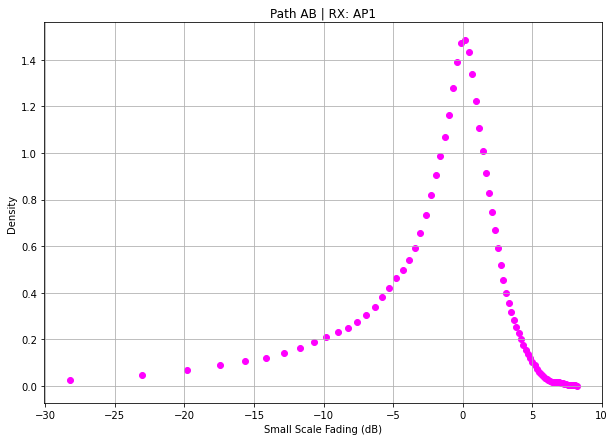

In [36]:
nAP = 'AP1'
estParameters_pathAB_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [37]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 167.6)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 75)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 138.5)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 38.4)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 0.9669983386993408 seconds.

Best Fitness: 168.71556728450946
Best Gen: 3
Kappa: 24.761982431194483
Mu: 0.22728988861637395
Omega: 1.0942682246530195
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 7.996703624725342 seconds.

Best Fitness: 75.00894354087563
Best Gen: 37
Kappa: 5.975773472600685
Mu: 0.6384406736553777
Omega: 1.1104966490815809


#### Estimated Parameters

In [39]:
mle_ku_pathAB_ap1 = [70, 0.084599, 1.0912] # KappaMu MLE
mle_au_pathAB_ap1 = [3.7795, 0.98044, 1.101] # AlphaMu MLE

estParameters_pathAB_ap1['MLE - KappaMu'] = mle_ku_pathAB_ap1
estParameters_pathAB_ap1['MLE - AlphaMu'] = mle_au_pathAB_ap1
estParameters_pathAB_ap1['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap1['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap1['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap1['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap1 = estParameters_pathAB_ap1.set_index(index)
estParameters_pathAB_ap1

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.000000,3.77950,24.761982,5.975773,3.618244,3.535239
mu,0.084599,0.98044,0.227290,0.638441,1.062054,0.756589
omega/r_hat,1.091200,1.10100,1.094268,1.110497,1.097977,1.114884


#### Plots

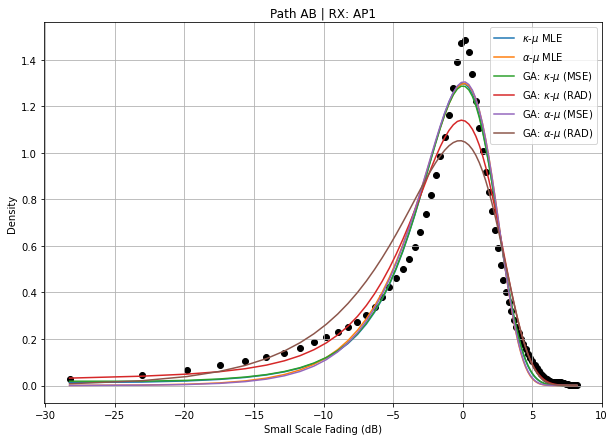

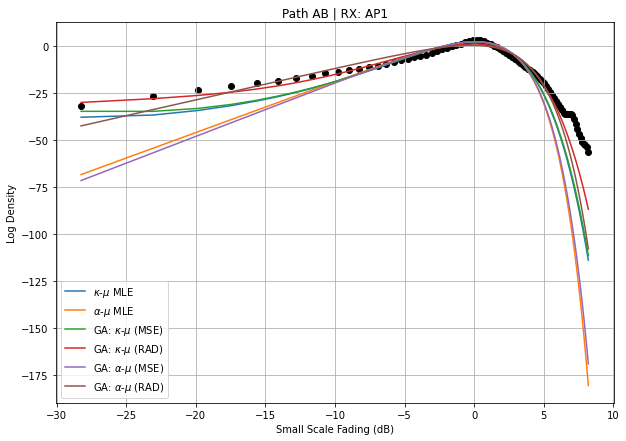

In [40]:
ku_AB_ap1_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap1[0], mle_ku_pathAB_ap1[1], mle_ku_pathAB_ap1[2]).astype(float)
au_AB_ap1_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap1[0], mle_au_pathAB_ap1[1], mle_au_pathAB_ap1[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap1_pdf,\
     au_AB_ap1_pdf,\
     estParameters_pathAB_ap1['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap1['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap1['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap1['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [41]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap1 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap1,\
                            mle_au_pathAB_ap1,\
                            estParameters_pathAB_ap1['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap1['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap1['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap1['GA: AlphaMu - RAD'])

Path: AB
RX: AP1


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),15323.111944
1,GA - KappaMu (Fitness = MSE),16009.706774
2,GA - AlphaMu (Fitness = RAD),16029.210545
3,MLE - KappaMu,16148.949489
4,GA - AlphaMu (Fitness = MSE),17791.209868
5,MLE - AlphaMu,17848.315733


### AP 2

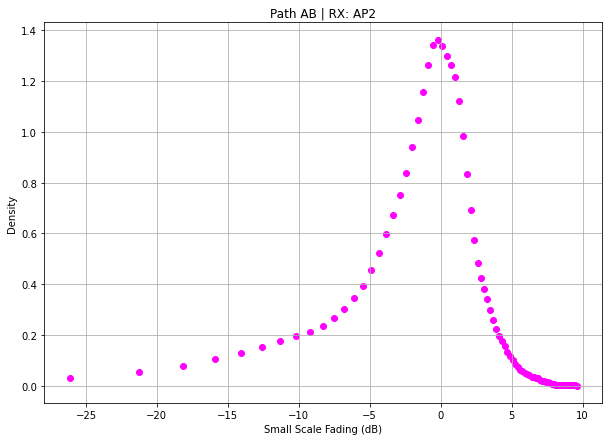

In [42]:
nAP = 'AP2'
estParameters_pathAB_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [43]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 263.6)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 50.2)


print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 205.6)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 36.6)


============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 1.9689581394195557 seconds.

Best Fitness: 268.51180914518284
Best Gen: 7
Kappa: 46.45867859359774
Mu: 0.12200017344335043
Omega: 1.061324499696363
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 33.347402811050415 seconds.

Best Fitness: 50.20469055327336
Best Gen: 154
Kappa: 5.615396897992428
Mu: 0.6443756240881792
Omega: 1.1091250664300991
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 19.178104400634766 seconds.

Best Fitness: [205.61046042]
Best Gen: 91
Kappa: 3.526515493470742
Mu: 1.0695343136323994
R_hat: 1.0855880260730026
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Max number of generation

#### Estimated Parameters

In [44]:
mle_ku_pathAB_ap2 = [70, 0.081811, 1.0624] # KappaMu MLE
mle_au_pathAB_ap2 = [3.6024, 1.0318, 1.086] # AlphaMu MLE

estParameters_pathAB_ap2['MLE - KappaMu'] = mle_ku_pathAB_ap2
estParameters_pathAB_ap2['MLE - AlphaMu'] = mle_au_pathAB_ap2
estParameters_pathAB_ap2['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap2['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap2['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap2['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap2 = estParameters_pathAB_ap2.set_index(index)
estParameters_pathAB_ap2

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.000000,3.6024,46.458679,5.615397,3.526515,2.347577
mu,0.081811,1.0318,0.122000,0.644376,1.069534,1.533556
omega/r_hat,1.062400,1.0860,1.061324,1.109125,1.085588,1.067054


#### Plots

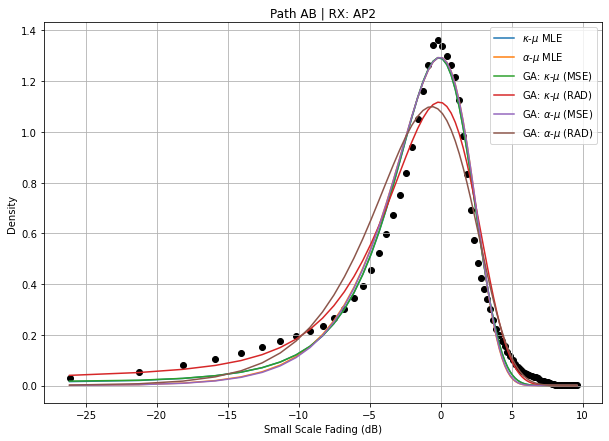

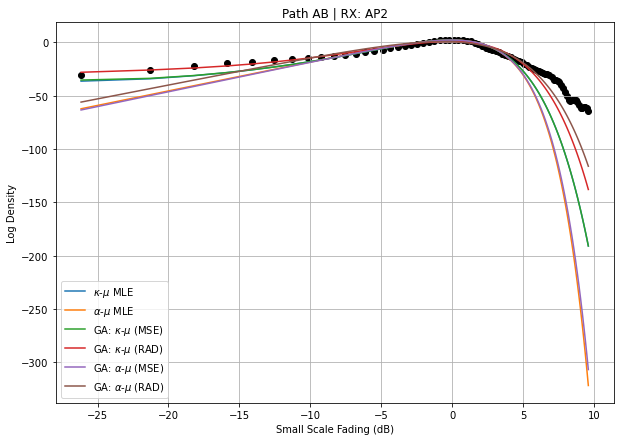

In [45]:
ku_AB_ap2_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap2[0], mle_ku_pathAB_ap2[1], mle_ku_pathAB_ap2[2]).astype(float)
au_AB_ap2_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap2[0], mle_au_pathAB_ap2[1], mle_au_pathAB_ap2[2]).astype(float)


plotResults(Xdata,\
     Ydata,\
     ku_AB_ap2_pdf,\
     au_AB_ap2_pdf,\
     estParameters_pathAB_ap2['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap2['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap2['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap2['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [54]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap2 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap2,\
                            mle_au_pathAB_ap2,\
                            estParameters_pathAB_ap2['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap2['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap2['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap2['GA: AlphaMu - RAD'])

Path: AB
RX: AP2


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),14044.592123
1,GA - AlphaMu (Fitness = RAD),14306.401486
2,GA - KappaMu (Fitness = MSE),15252.169154
3,MLE - KappaMu,15258.903614
4,GA - AlphaMu (Fitness = MSE),17096.707715
5,MLE - AlphaMu,17261.580975


### AP 3

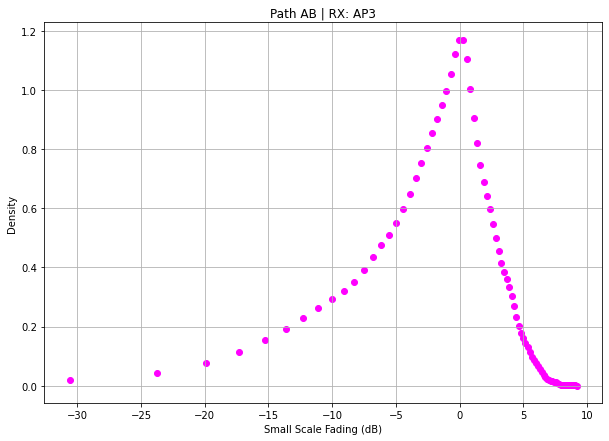

In [55]:
nAP = 'AP3'
estParameters_pathAB_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [49]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 387.2)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 163.5)


print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 291.3)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 84.4)


============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 35.13255190849304 seconds.

Best Fitness: 387.2585356624765
Best Gen: 147
Kappa: 4.760994681994462
Mu: 0.6090737104743236
Omega: 1.0918662260725491
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 3.575289487838745 seconds.

Best Fitness: 169.07175639738358
Best Gen: 14
Kappa: 1.5868879126847268
Mu: 1.0434009328811158
Omega: 1.1735017183951406
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 19.23304796218872 seconds.

Best Fitness: [291.31613692]
Best Gen: 95
Kappa: 2.9320023283055554
Mu: 0.9467751061307946
R_hat: 1.113715730441483
Genetic

#### Estimated Parameters

In [56]:
mle_ku_pathAB_ap3 = [3.9358, 0.70033, 1.0958] # KappaMu MLE
mle_au_pathAB_ap3 = [2.9752, 0.92743, 1.114] # AlphaMu MLE

estParameters_pathAB_ap3['MLE - KappaMu'] = mle_ku_pathAB_ap3
estParameters_pathAB_ap3['MLE - AlphaMu'] = mle_au_pathAB_ap3
estParameters_pathAB_ap3['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap3['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap3['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap3['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap3 = estParameters_pathAB_ap3.set_index(index)
estParameters_pathAB_ap3

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,3.93580,2.97520,4.760995,1.586888,2.932002,2.055817
mu,0.70033,0.92743,0.609074,1.043401,0.946775,1.430658
omega/r_hat,1.09580,1.11400,1.091866,1.173502,1.113716,1.074817


#### Plots

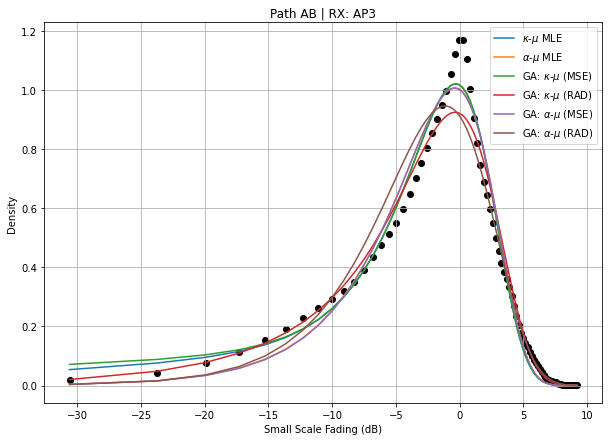

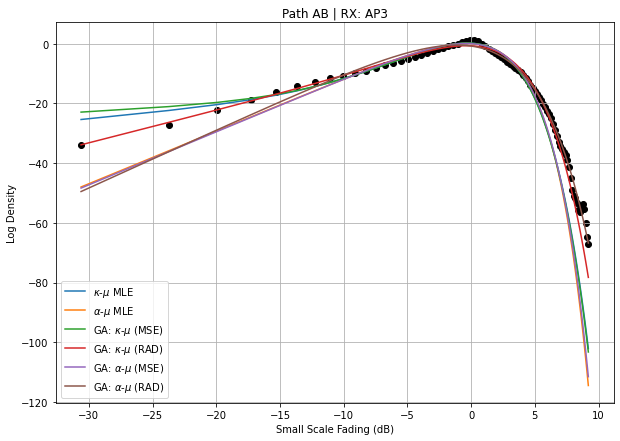

In [57]:
ku_AB_ap3_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap3[0], mle_ku_pathAB_ap3[1], mle_ku_pathAB_ap3[2]).astype(float)
au_AB_ap3_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap3[0], mle_au_pathAB_ap3[1], mle_au_pathAB_ap3[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap3_pdf,\
     au_AB_ap3_pdf,\
     estParameters_pathAB_ap3['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap3['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap3['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap3['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [58]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap3 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap3,\
                            mle_au_pathAB_ap3,\
                            estParameters_pathAB_ap3['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap3['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap3['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap3['GA: AlphaMu - RAD'])

Path: AB
RX: AP3


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),21621.136036
1,GA - AlphaMu (Fitness = RAD),21799.607000
2,MLE - KappaMu,21949.749742
3,GA - KappaMu (Fitness = MSE),22024.946915
4,GA - AlphaMu (Fitness = MSE),22042.383924
5,MLE - AlphaMu,22082.124659


### AP 4

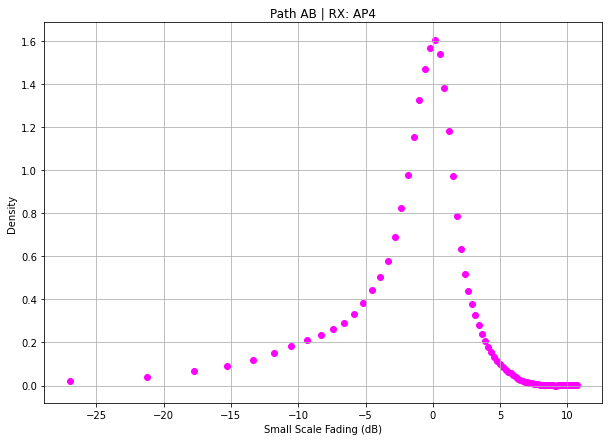

In [59]:
nAP = 'AP4'
estParameters_pathAB_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [60]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 138.4)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 34)


print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 121)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 23.2)


============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 1.2616910934448242 seconds.

Best Fitness: 138.40573405049693
Best Gen: 4
Kappa: 42.34072334672538
Mu: 0.16843497077956368
Omega: 1.051621583851925
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 4.155688524246216 seconds.

Best Fitness: 34.019235338395625
Best Gen: 17
Kappa: 9.348841000430971
Mu: 0.4727069558014535
Omega: 1.094025253189036
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Satisfactory Threshold reached!
Elapsed t

#### Estimated Parameters

In [61]:
mle_ku_pathAB_ap4 = [70, 0.1023, 1.0499] # KappaMu MLE
mle_au_pathAB_ap4 = [3.896, 1.1092, 1.0701] # AlphaMu MLE

estParameters_pathAB_ap4['MLE - KappaMu'] = mle_ku_pathAB_ap4
estParameters_pathAB_ap4['MLE - AlphaMu'] = mle_au_pathAB_ap4
estParameters_pathAB_ap4['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap4['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap4['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap4['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap4 = estParameters_pathAB_ap4.set_index(index)
estParameters_pathAB_ap4

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.0000,3.8960,42.340723,9.348841,3.763360,2.140781
mu,0.1023,1.1092,0.168435,0.472707,1.179980,1.994193
omega/r_hat,1.0499,1.0701,1.051622,1.094025,1.068069,1.088670


#### Plots

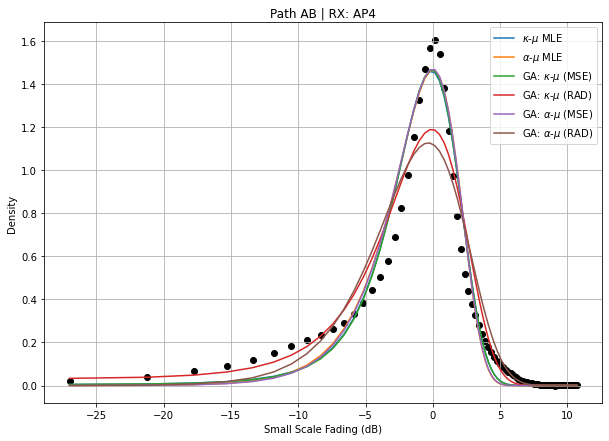

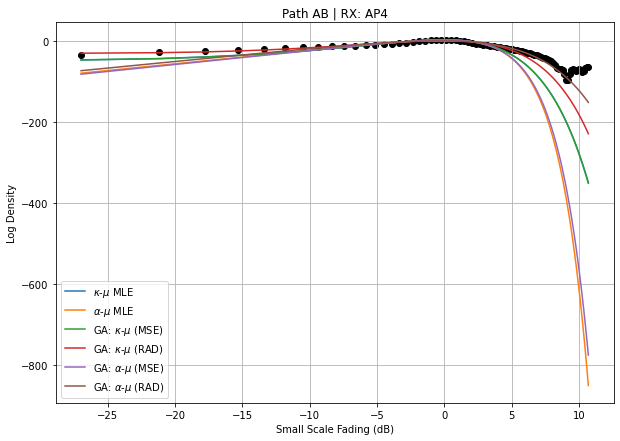

In [62]:
ku_AB_ap4_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap4[0], mle_ku_pathAB_ap4[1], mle_ku_pathAB_ap4[2]).astype(float)
au_AB_ap4_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap4[0], mle_au_pathAB_ap4[1], mle_au_pathAB_ap4[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap4_pdf,\
     au_AB_ap4_pdf,\
     estParameters_pathAB_ap4['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap4['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap4['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap4['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [63]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap4 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap4,\
                            mle_au_pathAB_ap4,\
                            estParameters_pathAB_ap4['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap4['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap4['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap4['GA: AlphaMu - RAD'])

Path: AB
RX: AP4


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),13490.391313
1,GA - AlphaMu (Fitness = RAD),14011.496311
2,MLE - KappaMu,15783.636475
3,GA - KappaMu (Fitness = MSE),15860.559714
4,GA - AlphaMu (Fitness = MSE),19353.461218
5,MLE - AlphaMu,19687.131702


### AP 5

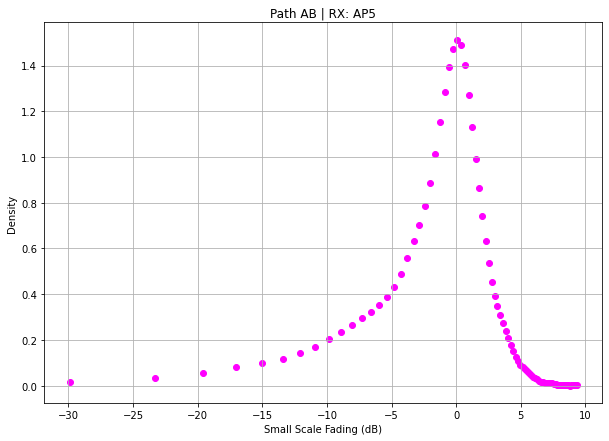

In [64]:
nAP = 'AP5'
estParameters_pathAB_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [65]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 166.7)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 51)


print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 142.5)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 18.4)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 1.2247288227081299 seconds.

Best Fitness: 166.89218910804536
Best Gen: 4
Kappa: 43.925836946558576
Mu: 0.14445489084332902
Omega: 1.0661451673612379
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 12.824696063995361 seconds.

Best Fitness: 51.000200751135736
Best Gen: 59
Kappa: 6.729629302779041
Mu: 0.6036876614549106
Omega: 1.1000751709298726
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 26.53546953201294 seconds.

Best Fitness: [142.50676153]
Best Gen: 132
Kappa: 3.89298835907907
Mu: 1.003089837313699
R_hat: 1.0868536274364793
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Satisfactory Threshold r

#### Estimated Parameters

In [66]:
mle_ku_pathAB_ap5 = [70, 0.091737, 1.0713] # KappaMu MLE
mle_au_pathAB_ap5 = [4.0603, 0.93926, 1.0889] # AlphaMu MLE

estParameters_pathAB_ap5['MLE - KappaMu'] = mle_ku_pathAB_ap5
estParameters_pathAB_ap5['MLE - AlphaMu'] = mle_au_pathAB_ap5
estParameters_pathAB_ap5['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap5['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap5['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap5['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap5 = estParameters_pathAB_ap5.set_index(index)
estParameters_pathAB_ap5

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.000000,4.06030,43.925837,6.729629,3.892988,1.954106
mu,0.091737,0.93926,0.144455,0.603688,1.003090,2.868681
omega/r_hat,1.071300,1.08890,1.066145,1.100075,1.086854,1.007905


#### Plots

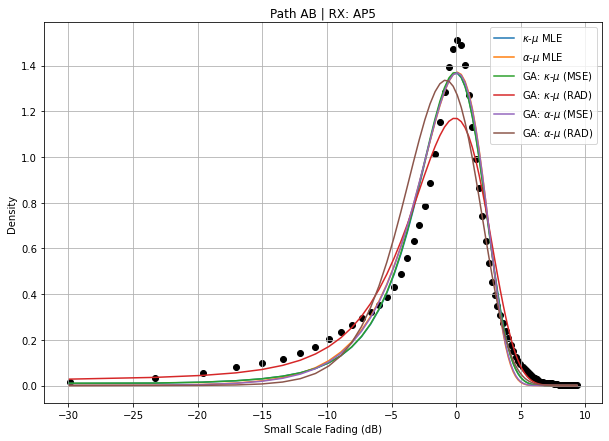

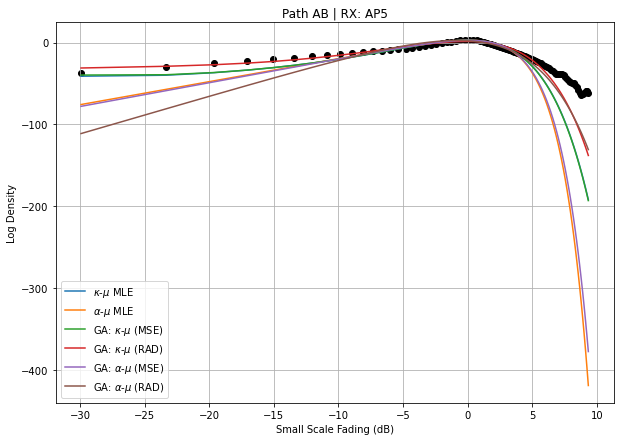

In [67]:
ku_AB_ap5_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap5[0], mle_ku_pathAB_ap5[1], mle_ku_pathAB_ap5[2]).astype(float)
au_AB_ap5_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap5[0], mle_au_pathAB_ap5[1], mle_au_pathAB_ap5[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap5_pdf,\
     au_AB_ap5_pdf,\
     estParameters_pathAB_ap5['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap5['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap5['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap5['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [68]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap5 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap5,\
                            mle_au_pathAB_ap5,\
                            estParameters_pathAB_ap5['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap5['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap5['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap5['GA: AlphaMu - RAD'])

Path: AB
RX: AP5


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),12990.292975
1,MLE - KappaMu,14161.015393
2,GA - KappaMu (Fitness = MSE),14193.982907
3,GA - AlphaMu (Fitness = RAD),14844.152376
4,GA - AlphaMu (Fitness = MSE),16578.817395
5,MLE - AlphaMu,16989.950902


### AP 6

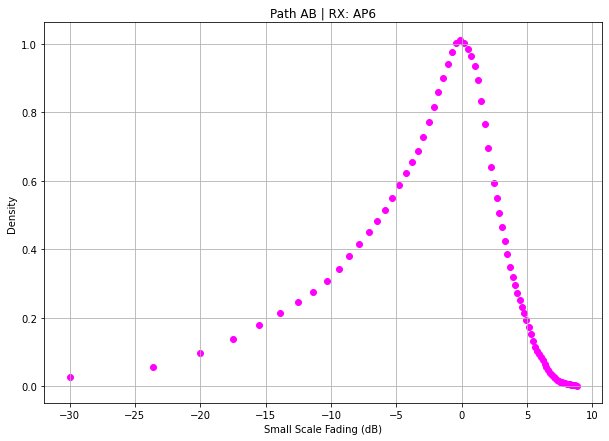

In [69]:
nAP = 'AP6'
estParameters_pathAB_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [70]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 776)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 276)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 505.8)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 130.5)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 14.203264474868774 seconds.

Best Fitness: 776.0056920470508
Best Gen: 58
Kappa: 3.03631956060117
Mu: 0.7469229600842611
Omega: 1.12929950037101
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 11.923628330230713 seconds.

Best Fitness: 276.05794928757143
Best Gen: 54
Kappa: 1.5552968267067653
Mu: 0.9888447044705809
Omega: 1.1809834595022122
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Satisfactory Threshold reached!
Elapsed t

#### Estimated Parameters

In [71]:
mle_ku_pathAB_ap6 = [2.9856, 0.75482, 1.1294] # KappaMu MLE
mle_au_pathAB_ap6 = [3.1744, 0.75118, 1.141] # AlphaMu MLE

estParameters_pathAB_ap6['MLE - KappaMu'] = mle_ku_pathAB_ap6
estParameters_pathAB_ap6['MLE - AlphaMu'] = mle_au_pathAB_ap6
estParameters_pathAB_ap6['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap6['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap6['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap6['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap6 = estParameters_pathAB_ap6.set_index(index)
estParameters_pathAB_ap6

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,2.98560,3.17440,3.036320,1.555297,3.167605,2.243305
mu,0.75482,0.75118,0.746923,0.988845,0.753477,1.094327
omega/r_hat,1.12940,1.14100,1.129300,1.180983,1.141258,1.111383


#### Plots

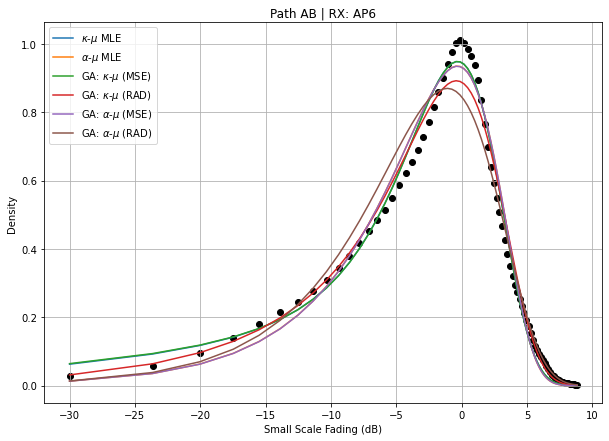

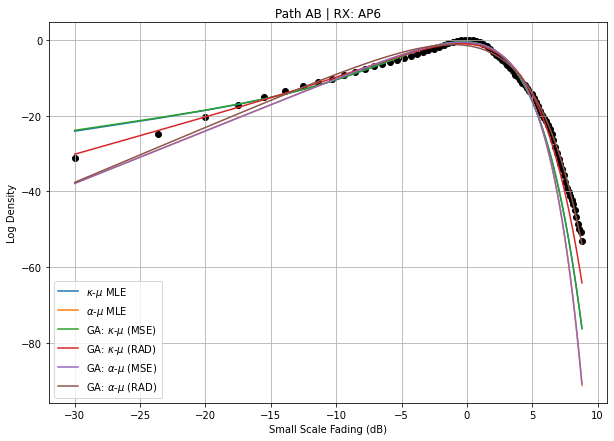

In [72]:
ku_AB_ap6_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap6[0], mle_ku_pathAB_ap6[1], mle_ku_pathAB_ap6[2]).astype(float)
au_AB_ap6_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap6[0], mle_au_pathAB_ap6[1], mle_au_pathAB_ap6[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap6_pdf,\
     au_AB_ap6_pdf,\
     estParameters_pathAB_ap6['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap6['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap6['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap6['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [73]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap6 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap6,\
                            mle_au_pathAB_ap6,\
                            estParameters_pathAB_ap6['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap6['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap6['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap6['GA: AlphaMu - RAD'])

Path: AB
RX: AP6


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),19206.700907
1,GA - AlphaMu (Fitness = RAD),19325.933506
2,MLE - KappaMu,19408.443744
3,GA - KappaMu (Fitness = MSE),19413.294018
4,GA - AlphaMu (Fitness = MSE),19570.712167
5,MLE - AlphaMu,19578.516516


### AP 7

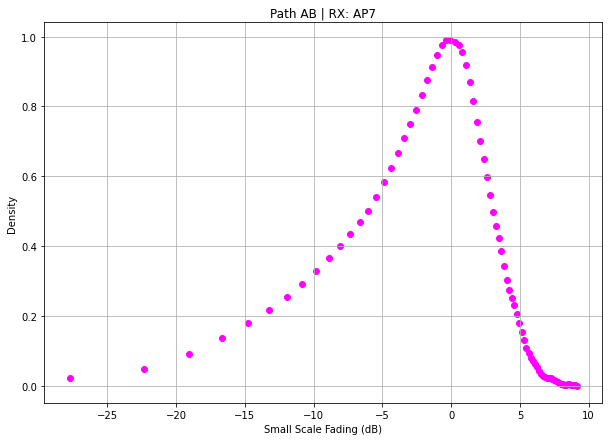

In [85]:
nAP = 'AP7'
estParameters_pathAB_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [87]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 1328)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 420)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 1002.6)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 250)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 1.218735933303833 seconds.

Best Fitness: 1497.3670854170969
Best Gen: 4
Kappa: 2.558880190554125
Mu: 0.8213077685878575
Omega: 1.1268478540016007
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 12.442092418670654 seconds.

Best Fitness: 420.02839055483264
Best Gen: 55
Kappa: 1.4974209217030565
Mu: 1.0519507739241176
Omega: 1.1677856111660159
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 32.5626175403595 seconds.

Best Fitness: [1002.62797334]
Best Gen: 160
Kappa: 3.3180984223515515
Mu: 0.7176553002922204
R_hat: 1.1449099536218303
Genet

#### Estimated Parameters

In [89]:
mle_ku_pathAB_ap7 = [2.7588, 0.80981, 1.1366] # KappaMu MLE
mle_au_pathAB_ap7 = [3.3109, 0.72071, 1.1448] # AlphaMu MLE

estParameters_pathAB_ap7['MLE - KappaMu'] = mle_ku_pathAB_ap7
estParameters_pathAB_ap7['MLE - AlphaMu'] = mle_au_pathAB_ap7
estParameters_pathAB_ap7['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap7['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap7['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap7['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap7 = estParameters_pathAB_ap7.set_index(index)
estParameters_pathAB_ap7

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,2.75880,3.31090,2.558880,1.497421,3.318098,2.975201
mu,0.80981,0.72071,0.821308,1.051951,0.717655,0.778536
omega/r_hat,1.13660,1.14480,1.126848,1.167786,1.144910,1.147730


#### Plots

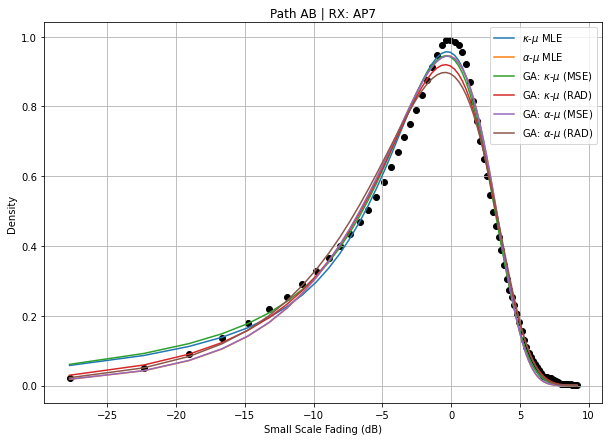

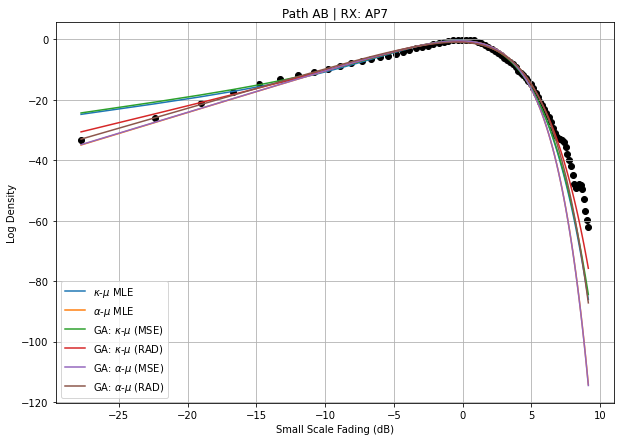

In [90]:
ku_AB_ap7_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap7[0], mle_ku_pathAB_ap7[1], mle_ku_pathAB_ap7[2]).astype(float)
au_AB_ap7_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap7[0], mle_au_pathAB_ap7[1], mle_au_pathAB_ap7[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap7_pdf,\
     au_AB_ap7_pdf,\
     estParameters_pathAB_ap7['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap7['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap7['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap7['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [91]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap7 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap7,\
                            mle_au_pathAB_ap7,\
                            estParameters_pathAB_ap7['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap7['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap7['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap7['GA: AlphaMu - RAD'])

Path: AB
RX: AP7


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),19799.389542
1,GA - AlphaMu (Fitness = RAD),19883.664106
2,GA - KappaMu (Fitness = MSE),19931.897351
3,MLE - KappaMu,19939.579846
4,MLE - AlphaMu,20149.937527
5,GA - AlphaMu (Fitness = MSE),20153.342740


### AP 8

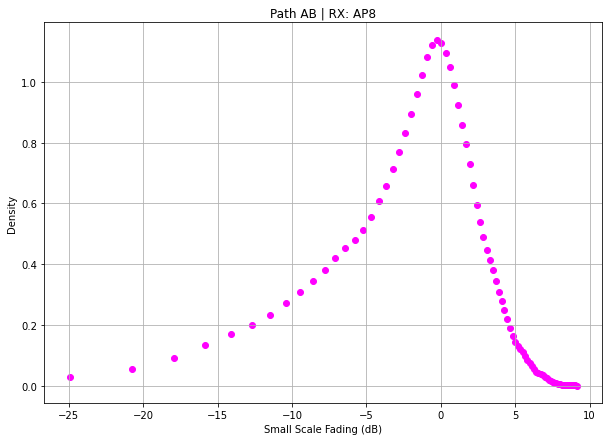

In [102]:
nAP = 'AP8'
estParameters_pathAB_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [103]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 504.8)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 160.7)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 349.4)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 123)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 10.861371755599976 seconds.

Best Fitness: 504.85657470087966
Best Gen: 43
Kappa: 16.29572692195497
Mu: 0.22219597559760548
Omega: 1.0734636384231913
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 7.04668927192688 seconds.

Best Fitness: 160.71084681559847
Best Gen: 31
Kappa: 1.5959962372734788
Mu: 1.0930347319873486
Omega: 1.1548698412100589
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 7.913789987564087 seconds.

Best Fitness: [349.45344278]
Best Gen: 38
Kappa: 3.067659845388524
Mu: 0.918463387196853
R_hat: 1.1122270915307888
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Max number of generations

#### Estimated Parameters

In [104]:
mle_ku_pathAB_ap8 = [70, 0.054552, 1.0672] # KappaMu MLE
mle_au_pathAB_ap8 = [3.0939, 0.90552, 1.1124] # AlphaMu MLE

estParameters_pathAB_ap8['MLE - KappaMu'] = mle_ku_pathAB_ap8
estParameters_pathAB_ap8['MLE - AlphaMu'] = mle_au_pathAB_ap8
estParameters_pathAB_ap8['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap8['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap8['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap8['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap8 = estParameters_pathAB_ap8.set_index(index)
estParameters_pathAB_ap8

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,70.000000,3.09390,16.295727,1.595996,3.067660,2.639089
mu,0.054552,0.90552,0.222196,1.093035,0.918463,1.032764
omega/r_hat,1.067200,1.11240,1.073464,1.154870,1.112227,1.119849


#### Plots

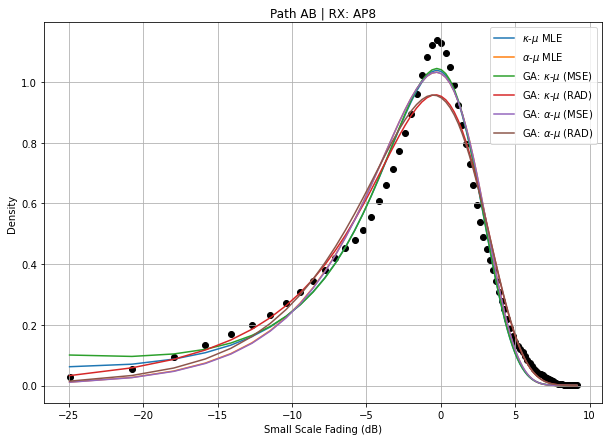

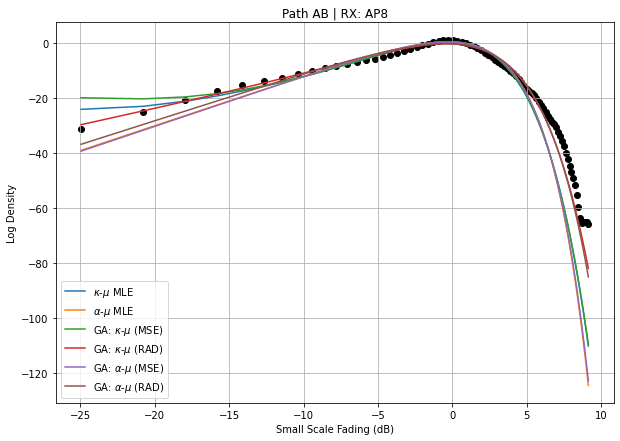

In [105]:
ku_AB_ap8_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap8[0], mle_ku_pathAB_ap8[1], mle_ku_pathAB_ap8[2]).astype(float)
au_AB_ap8_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap8[0], mle_au_pathAB_ap8[1], mle_au_pathAB_ap8[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap8_pdf,\
     au_AB_ap8_pdf,\
     estParameters_pathAB_ap8['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap8['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap8['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap8['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [106]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap8 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap8,\
                            mle_au_pathAB_ap8,\
                            estParameters_pathAB_ap8['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap8['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap8['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap8['GA: AlphaMu - RAD'])

Path: AB
RX: AP8


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),18405.548634
1,GA - AlphaMu (Fitness = RAD),18465.738184
2,GA - AlphaMu (Fitness = MSE),18988.229497
3,MLE - AlphaMu,19010.430870
4,GA - KappaMu (Fitness = MSE),19289.715400
5,MLE - KappaMu,19547.091216


### AP 9

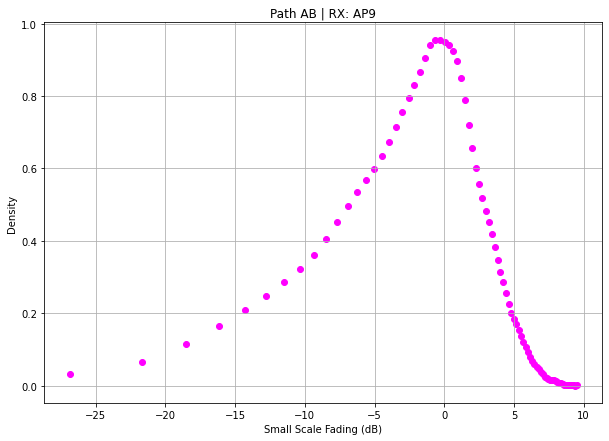

In [107]:
nAP = 'AP9'
estParameters_pathAB_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [108]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 1263.9)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 379.9)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 890.8)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 73)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Satisfactory Threshold reached!
Elapsed time is 22.671067237854004 seconds.

Best Fitness: 1263.9279981547631
Best Gen: 91
Kappa: 1.8899006865642571
Mu: 0.9142094426903835
Omega: 1.1315778617424261
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 34.60352611541748 seconds.

Best Fitness: 379.9594040625248
Best Gen: 150
Kappa: 0.9327533760633417
Mu: 1.1154205292471087
Omega: 1.1861836413362439
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Satisfactory Threshold reached!
Elapsed time is 31.95362114906311 seconds.

Best Fitness: [890.84548894]
Best Gen: 152
Kappa: 2.8430720820201785
Mu: 0.828204489848947
R_hat: 1.1308366644369514
Gene

#### Estimated Parameters

In [110]:
mle_ku_pathAB_ap9 = [1.9103, 0.90984, 1.1314] # KappaMu MLE
mle_au_pathAB_ap9 = [2.8416, 0.82981, 1.1307] # AlphaMu MLE

estParameters_pathAB_ap9['MLE - KappaMu'] = mle_ku_pathAB_ap9
estParameters_pathAB_ap9['MLE - AlphaMu'] = mle_au_pathAB_ap9
estParameters_pathAB_ap9['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathAB_ap9['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathAB_ap9['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathAB_ap9['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathAB_ap9 = estParameters_pathAB_ap9.set_index(index)
estParameters_pathAB_ap9

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.91030,2.84160,1.889901,0.932753,2.843072,1.771932
mu,0.90984,0.82981,0.914209,1.115421,0.828204,1.747846
omega/r_hat,1.13140,1.13070,1.131578,1.186184,1.130837,1.040686


#### Plots

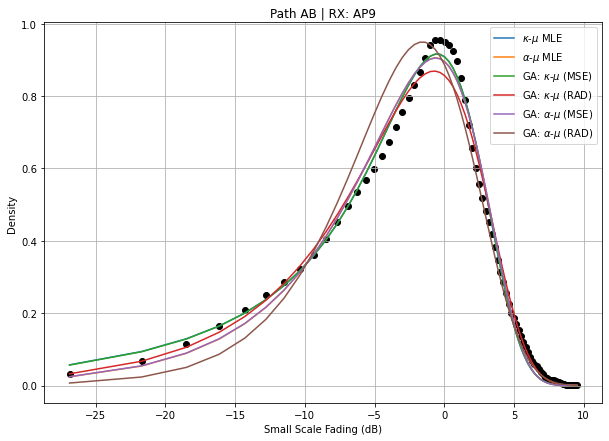

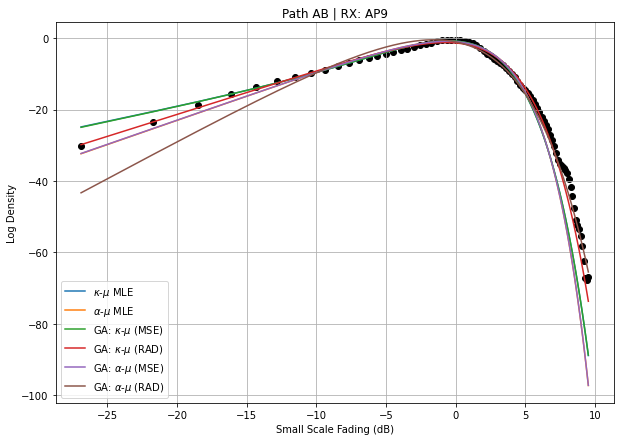

In [111]:
ku_AB_ap9_pdf = KappaMuPDF(Xdata, mle_ku_pathAB_ap9[0], mle_ku_pathAB_ap9[1], mle_ku_pathAB_ap9[2]).astype(float)
au_AB_ap9_pdf = AlphaMuPDF(Xdata, mle_au_pathAB_ap9[0], mle_au_pathAB_ap9[1], mle_au_pathAB_ap9[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_AB_ap9_pdf,\
     au_AB_ap9_pdf,\
     estParameters_pathAB_ap9['GA: KappaMu - MSE'],\
     estParameters_pathAB_ap9['GA: KappaMu - RAD'],\
     estParameters_pathAB_ap9['GA: AlphaMu - MSE'],\
     estParameters_pathAB_ap9['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [112]:
## AIC Analysis
data = SSF_pathAB_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap9 = computeAIC(data, n, K,\
                            mle_ku_pathAB_ap9,\
                            mle_au_pathAB_ap9,\
                            estParameters_pathAB_ap9['GA: KappaMu - MSE'],\
                            estParameters_pathAB_ap9['GA: KappaMu - RAD'],\
                            estParameters_pathAB_ap9['GA: AlphaMu - MSE'],\
                            estParameters_pathAB_ap9['GA: AlphaMu - RAD'])

Path: AB
RX: AP9


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),20946.630118
1,GA - KappaMu (Fitness = MSE),21142.658109
2,MLE - KappaMu,21146.497402
3,GA - AlphaMu (Fitness = MSE),21153.163602
4,MLE - AlphaMu,21154.779206
5,GA - AlphaMu (Fitness = RAD),21201.049222


## $\alpha$-$\mu$ and $\kappa$-$\mu$ - Path: BA



In [128]:
path = 'BA'

### AP 1

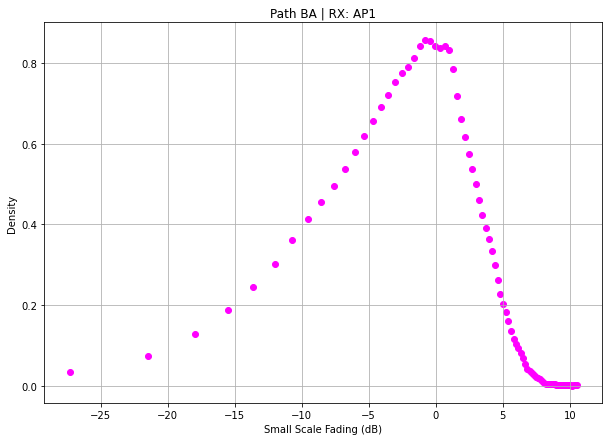

In [129]:
nAP = 'AP1'
estParameters_pathBA_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [131]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 4526)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 1397.5)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 3752)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 70)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 15.367054224014282 seconds.

Best Fitness: 4526.206824936778
Best Gen: 56
Kappa: 1.0705233471795264
Mu: 1.0168246390613112
Omega: 1.1877588758326598
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 12.911386966705322 seconds.

Best Fitness: 1397.6973052717713
Best Gen: 45
Kappa: 0.7476036521221078
Mu: 1.0938708244838842
Omega: 1.2067219850371687
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elaps

#### Estimated Parameters

In [132]:
mle_ku_pathBA_ap1 = [1.0728, 1.0154, 1.1878] # KappaMu MLE
mle_au_pathBA_ap1 = [2.7032, 0.79288, 1.1482] # AlphaMu MLE

estParameters_pathBA_ap1['MLE - KappaMu'] = mle_ku_pathBA_ap1
estParameters_pathBA_ap1['MLE - AlphaMu'] = mle_au_pathBA_ap1
estParameters_pathBA_ap1['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap1['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap1['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap1['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap1 = estParameters_pathBA_ap1.set_index(index)
estParameters_pathBA_ap1

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.0728,2.70320,1.070523,0.747604,2.697047,1.251500
mu,1.0154,0.79288,1.016825,1.093871,0.795772,2.909237
omega/r_hat,1.1878,1.14820,1.187759,1.206722,1.147803,1.014963


#### Plots

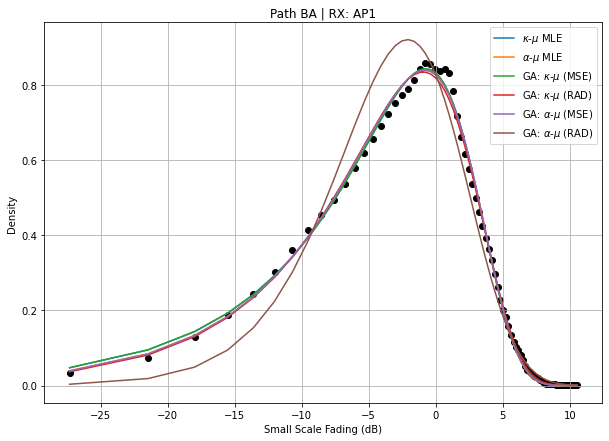

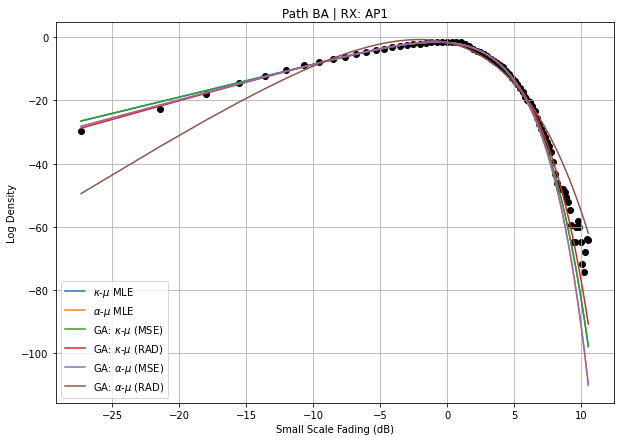

In [133]:
ku_BA_ap1_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap1[0], mle_ku_pathBA_ap1[1], mle_ku_pathBA_ap1[2]).astype(float)
au_BA_ap1_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap1[0], mle_au_pathBA_ap1[1], mle_au_pathBA_ap1[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap1_pdf,\
     au_BA_ap1_pdf,\
     estParameters_pathBA_ap1['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap1['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap1['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap1['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [134]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap1 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap1,\
                            mle_au_pathBA_ap1,\
                            estParameters_pathBA_ap1['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap1['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap1['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap1['GA: AlphaMu - RAD'])

Path: BA
RX: AP1


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),25385.548710
1,GA - KappaMu (Fitness = MSE),25425.033535
2,MLE - KappaMu,25425.449618
3,GA - AlphaMu (Fitness = MSE),25441.202411
4,MLE - AlphaMu,25442.893688
5,GA - AlphaMu (Fitness = RAD),26021.999800


### AP 2

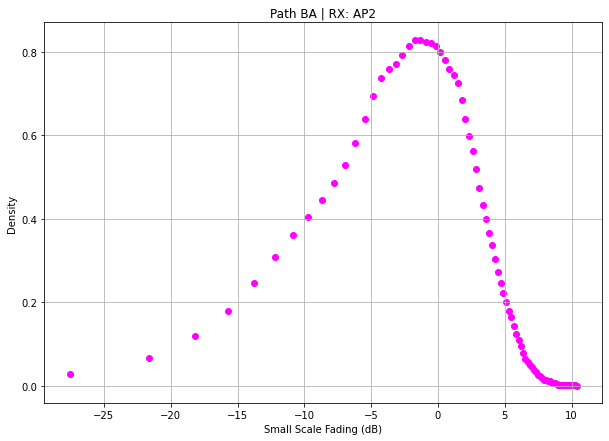

In [135]:
nAP = 'AP2'
estParameters_pathBA_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [136]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 12580)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 2502)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 12151)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 488)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 17.873457670211792 seconds.

Best Fitness: 12580.29195304178
Best Gen: 75
Kappa: 0.5876363877661399
Mu: 1.1179210770167034
Omega: 1.2014299729817317
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 28.627232551574707 seconds.

Best Fitness: 2502.553981236545
Best Gen: 122
Kappa: 0.3527449897212216
Mu: 1.1617771546622258
Omega: 1.2181629522585693
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elaps

#### Estimated Parameters

In [137]:
mle_ku_pathBA_ap2 = [0.5874, 1.1176, 1.2014] # KappaMu MLE
mle_au_pathBA_ap2 = [2.3342, 0.95683, 1.1278] # AlphaMu MLE

estParameters_pathBA_ap2['MLE - KappaMu'] = mle_ku_pathBA_ap2
estParameters_pathBA_ap2['MLE - AlphaMu'] = mle_au_pathBA_ap2
estParameters_pathBA_ap2['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap2['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap2['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap2['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap2 = estParameters_pathBA_ap2.set_index(index)
estParameters_pathBA_ap2

,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,2.33420,0.587636,0.352745,2.333960,1.880603
mu,0.95683,1.117921,1.161777,0.957020,1.268661
omega/r_hat,1.12780,1.201430,1.218163,1.127855,1.102490


#### Plots

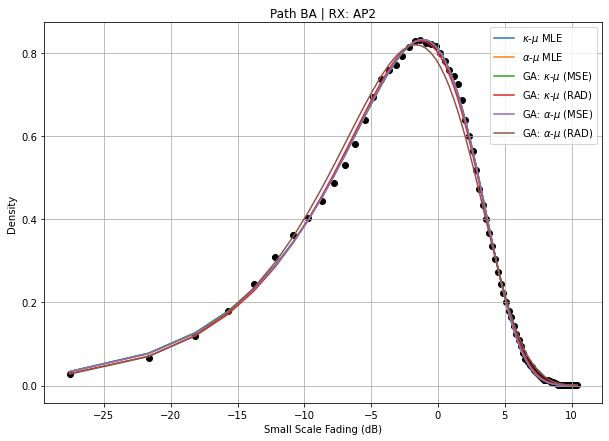

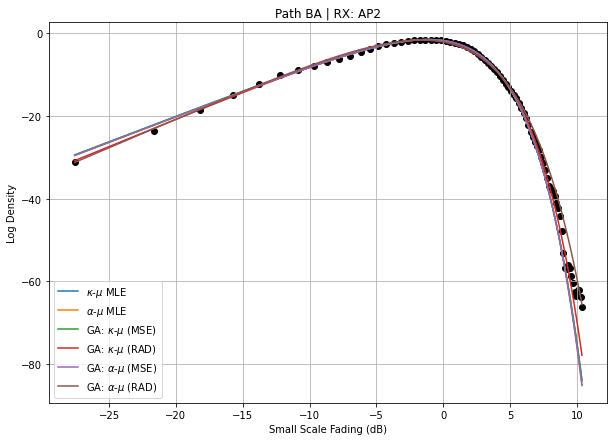

In [138]:
ku_BA_ap2_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap2[0], mle_ku_pathBA_ap2[1], mle_ku_pathBA_ap2[2]).astype(float)
au_BA_ap2_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap2[0], mle_au_pathBA_ap2[1], mle_au_pathBA_ap2[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap2_pdf,\
     au_BA_ap2_pdf,\
     estParameters_pathBA_ap2['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap2['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap2['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap2['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [139]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap2 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap2,\
                            mle_au_pathBA_ap2,\
                            estParameters_pathBA_ap2['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap2['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap2['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap2['GA: AlphaMu - RAD'])

Path: BA
RX: AP2


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),25402.785594
1,GA - AlphaMu (Fitness = MSE),25427.300261
2,MLE - AlphaMu,25427.437296
3,MLE - KappaMu,25427.547122
4,GA - KappaMu (Fitness = MSE),25427.547284
5,GA - AlphaMu (Fitness = RAD),25473.321474


### AP 3

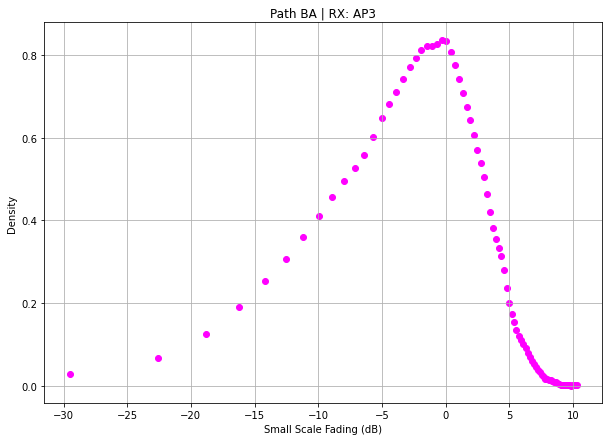

In [140]:
nAP = 'AP3'
estParameters_pathBA_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [141]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 7789)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 1203)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 6495)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 241)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 30.33752727508545 seconds.

Best Fitness: 7789.0911035769695
Best Gen: 124
Kappa: 0.8737311355847966
Mu: 1.0205760924298204
Omega: 1.196211905095145
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 8.348337888717651 seconds.

Best Fitness: 1203.0703632956108
Best Gen: 37
Kappa: 0.5080397351298175
Mu: 1.0960348023766189
Omega: 1.2214913274716759
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Po

#### Estimated Parameters

In [142]:
mle_ku_pathBA_ap3 = [0.87074, 1.0208, 1.1965] # KappaMu MLE
mle_au_pathBA_ap3 = [2.5463, 0.82408, 1.1439] # AlphaMu MLE

estParameters_pathBA_ap3['MLE - KappaMu'] = mle_ku_pathBA_ap3
estParameters_pathBA_ap3['MLE - AlphaMu'] = mle_au_pathBA_ap3
estParameters_pathBA_ap3['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap3['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap3['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap3['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap3 = estParameters_pathBA_ap3.set_index(index)
estParameters_pathBA_ap3

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,0.87074,2.54630,0.873731,0.508040,2.545507,2.698432
mu,1.02080,0.82408,1.020576,1.096035,0.824320,0.736974
omega/r_hat,1.19650,1.14390,1.196212,1.221491,1.143976,1.193228


#### Plots

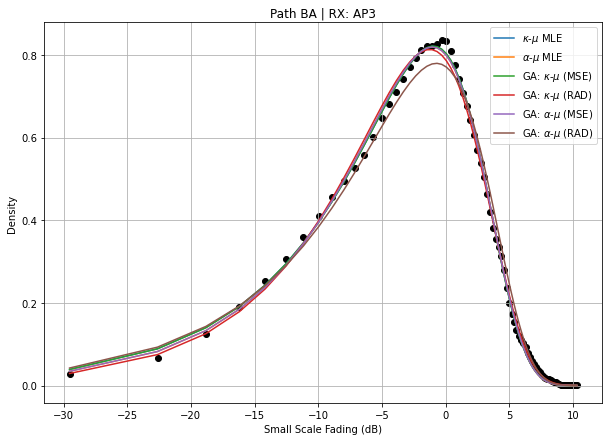

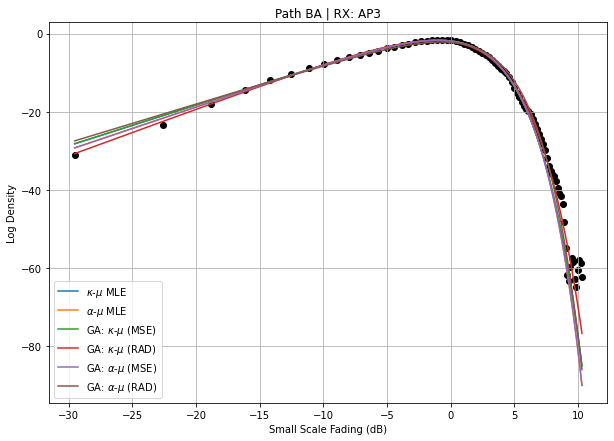

In [143]:
ku_BA_ap3_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap3[0], mle_ku_pathBA_ap3[1], mle_ku_pathBA_ap3[2]).astype(float)
au_BA_ap3_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap3[0], mle_au_pathBA_ap3[1], mle_au_pathBA_ap3[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap3_pdf,\
     au_BA_ap3_pdf,\
     estParameters_pathBA_ap3['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap3['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap3['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap3['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [145]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap3 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap3,\
                            mle_au_pathBA_ap3,\
                            estParameters_pathBA_ap3['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap3['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap3['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap3['GA: AlphaMu - RAD'])

Path: BA
RX: AP3


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),24779.609228
1,MLE - KappaMu,24833.717707
2,GA - KappaMu (Fitness = MSE),24834.609502
3,GA - AlphaMu (Fitness = MSE),24841.739067
4,MLE - AlphaMu,24842.314912
5,GA - AlphaMu (Fitness = RAD),24911.040523


### AP 4

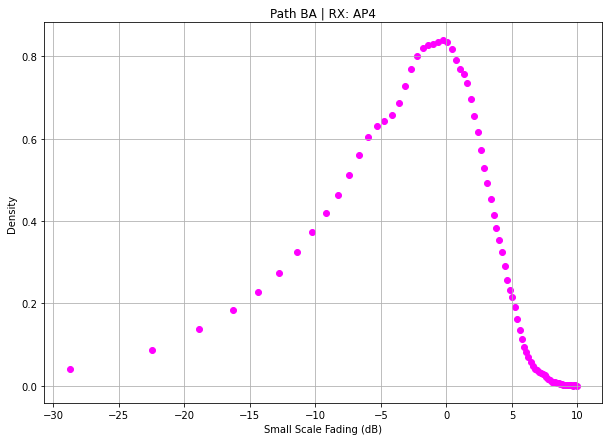

In [146]:
nAP = 'AP4'
estParameters_pathBA_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [147]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 9920)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 1525)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 7493)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 470)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 17.40211582183838 seconds.

Best Fitness: 9920.245695078325
Best Gen: 66
Kappa: 1.209861305190665
Mu: 0.9637275659072801
Omega: 1.1938126373915445
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 23.20997929573059 seconds.

Best Fitness: 1525.0987328608471
Best Gen: 87
Kappa: 0.965494307748583
Mu: 1.0176178724878255
Omega: 1.2068422448119906
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 21.114553689956665 seconds.

Best Fitness: [7494.28750966]
Best Gen: 102


#### Estimated Parameters

In [148]:
mle_ku_pathBA_ap4 = [1.2076, 0.96427, 1.1942] # KappaMu MLE
mle_au_pathBA_ap4 = [2.8763, 0.71398, 1.1614] # AlphaMu MLE

estParameters_pathBA_ap4['MLE - KappaMu'] = mle_ku_pathBA_ap4
estParameters_pathBA_ap4['MLE - AlphaMu'] = mle_au_pathBA_ap4
estParameters_pathBA_ap4['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap4['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap4['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap4['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap4 = estParameters_pathBA_ap4.set_index(index)
estParameters_pathBA_ap4

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.20760,2.87630,1.209861,0.965494,2.878131,2.325080
mu,0.96427,0.71398,0.963728,1.017618,0.713509,0.974296
omega/r_hat,1.19420,1.16140,1.193813,1.206842,1.161363,1.110226


#### Plots

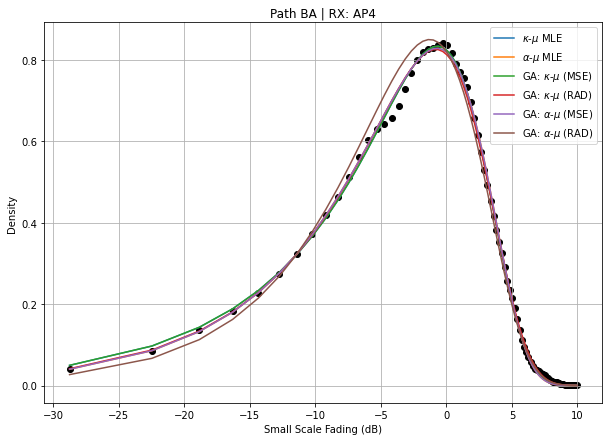

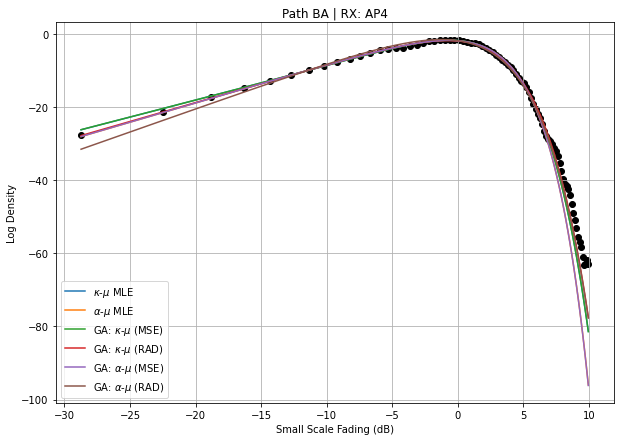

In [149]:
ku_BA_ap4_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap4[0], mle_ku_pathBA_ap4[1], mle_ku_pathBA_ap4[2]).astype(float)
au_BA_ap4_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap4[0], mle_au_pathBA_ap4[1], mle_au_pathBA_ap4[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap4_pdf,\
     au_BA_ap4_pdf,\
     estParameters_pathBA_ap4['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap4['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap4['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap4['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [150]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap4 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap4,\
                            mle_au_pathBA_ap4,\
                            estParameters_pathBA_ap4['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap4['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap4['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap4['GA: AlphaMu - RAD'])

Path: BA
RX: AP4


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),25153.399787
1,MLE - KappaMu,25174.263565
2,GA - KappaMu (Fitness = MSE),25174.703236
3,GA - AlphaMu (Fitness = RAD),25192.596306
4,MLE - AlphaMu,25232.135044
5,GA - AlphaMu (Fitness = MSE),25233.189673


### AP 5

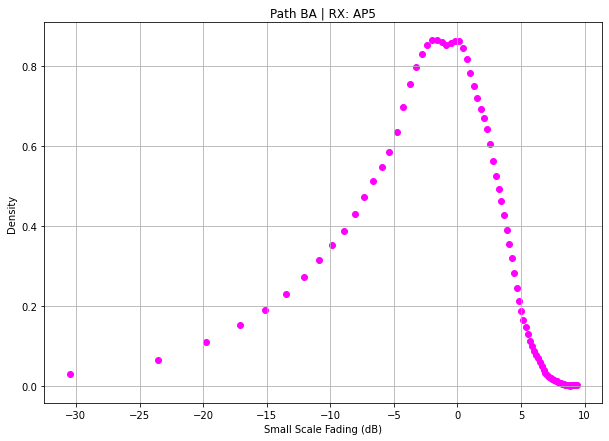

In [151]:
nAP = 'AP5'
estParameters_pathBA_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [153]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 5756)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 2246)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 4603)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 500)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 23.85184907913208 seconds.

Best Fitness: 5756.011036363162
Best Gen: 90
Kappa: 1.109382105470904
Mu: 1.0588697349087832
Omega: 1.1815364600218066
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 32.90824794769287 seconds.

Best Fitness: 2246.8364941657364
Best Gen: 138
Kappa: 1.1488982305556286
Mu: 1.0346683849771834
Omega: 1.1891229957081462
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 27.956831216812134 seconds.

Best Fitness: [4603.70620696]
Best Gen: 121
Kappa: 2.6671852288506583
Mu: 0.8533494550814101
R_hat: 1.1418419512500284
Gen

#### Estimated Parameters

In [154]:
mle_ku_pathBA_ap5 = [1.1126, 1.0574, 1.1813] # KappaMu MLE
mle_au_pathBA_ap5 = [2.6665, 0.85346, 1.1417] # AlphaMu MLE

estParameters_pathBA_ap5['MLE - KappaMu'] = mle_ku_pathBA_ap5
estParameters_pathBA_ap5['MLE - AlphaMu'] = mle_au_pathBA_ap5
estParameters_pathBA_ap5['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap5['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap5['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap5['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap5 = estParameters_pathBA_ap5.set_index(index)
estParameters_pathBA_ap5

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.1126,2.66650,1.109382,1.148898,2.667185,2.922932
mu,1.0574,0.85346,1.058870,1.034668,0.853349,0.763211
omega/r_hat,1.1813,1.14170,1.181536,1.189123,1.141842,1.161881


#### Plots

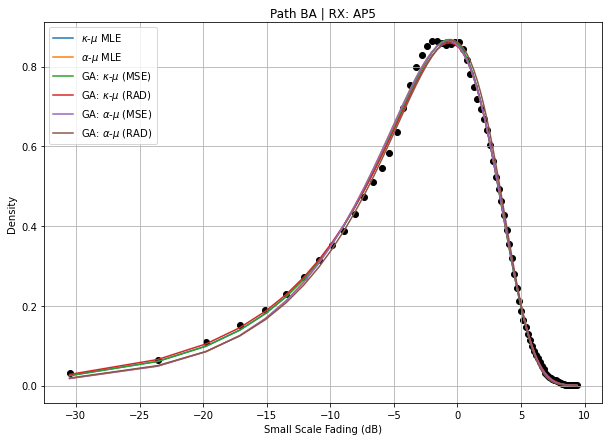

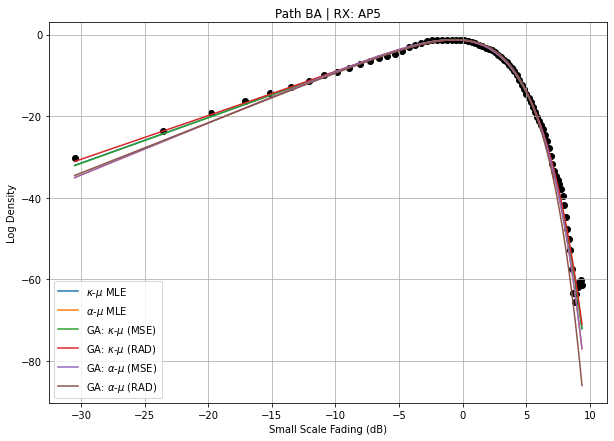

In [155]:
ku_BA_ap5_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap5[0], mle_ku_pathBA_ap5[1], mle_ku_pathBA_ap5[2]).astype(float)
au_BA_ap5_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap5[0], mle_au_pathBA_ap5[1], mle_au_pathBA_ap5[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap5_pdf,\
     au_BA_ap5_pdf,\
     estParameters_pathBA_ap5['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap5['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap5['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap5['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [156]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap5 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap5,\
                            mle_au_pathBA_ap5,\
                            estParameters_pathBA_ap5['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap5['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap5['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap5['GA: AlphaMu - RAD'])

Path: BA
RX: AP5


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = MSE),22977.659290
1,MLE - KappaMu,22977.786163
2,GA - KappaMu (Fitness = RAD),22980.824689
3,MLE - AlphaMu,22991.054595
4,GA - AlphaMu (Fitness = MSE),22991.159833
5,GA - AlphaMu (Fitness = RAD),23039.710209


### AP 6

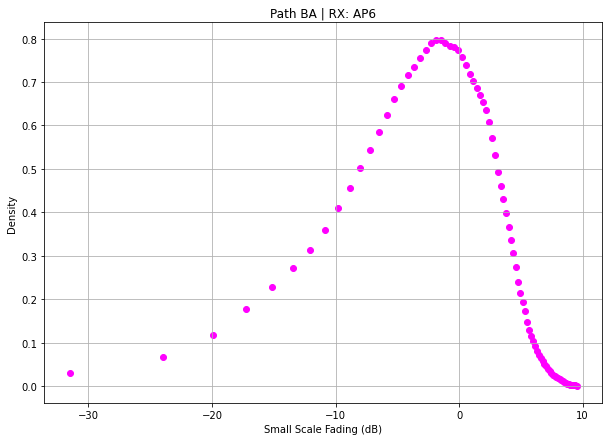

In [157]:
nAP = 'AP6'
estParameters_pathBA_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [158]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 11485)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 2017)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 12163)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 1204)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 32.18188953399658 seconds.

Best Fitness: 11486.96981490676
Best Gen: 114
Kappa: 0.7048344577592409
Mu: 1.0285415883386464
Omega: 1.2218604490561342
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 33.13755941390991 seconds.

Best Fitness: 2017.8451714246653
Best Gen: 132
Kappa: 0.5783511413805463
Mu: 1.0560028171070737
Omega: 1.2270078448003605
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Max number of generations reached! (P

1204

#### Estimated Parameters

In [162]:
mle_ku_pathBA_ap6 = [0.70449, 1.0284, 1.222] # KappaMu MLE
mle_au_pathBA_ap6 = [2.5138, 0.81093, 1.151] # AlphaMu MLE

estParameters_pathBA_ap6['MLE - KappaMu'] = mle_ku_pathBA_ap6
estParameters_pathBA_ap6['MLE - AlphaMu'] = mle_au_pathBA_ap6
estParameters_pathBA_ap6['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap6['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap6['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap6['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap6 = estParameters_pathBA_ap6.set_index(index)
estParameters_pathBA_ap6

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,0.70449,2.51380,0.704834,0.578351,2.514832,2.164255
mu,1.02840,0.81093,1.028542,1.056003,0.810444,1.032253
omega/r_hat,1.22200,1.15100,1.221860,1.227008,1.150990,1.120368


#### Plots

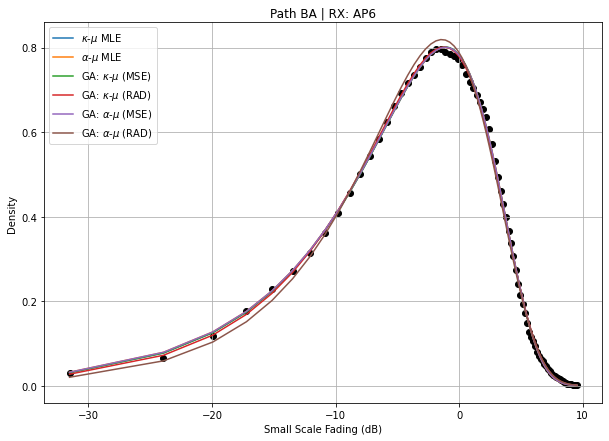

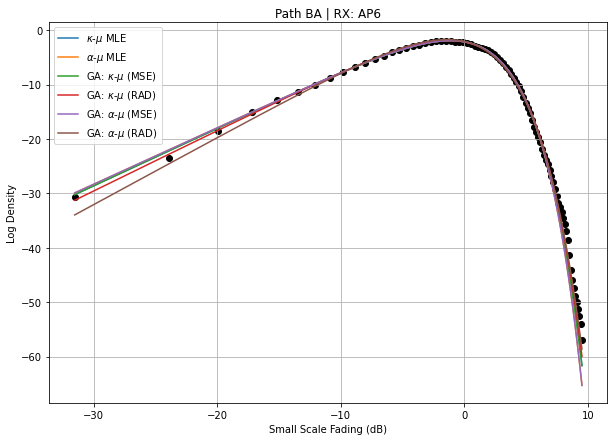

In [163]:
ku_BA_ap6_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap6[0], mle_ku_pathBA_ap6[1], mle_ku_pathBA_ap6[2]).astype(float)
au_BA_ap6_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap6[0], mle_au_pathBA_ap6[1], mle_au_pathBA_ap6[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap6_pdf,\
     au_BA_ap6_pdf,\
     estParameters_pathBA_ap6['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap6['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap6['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap6['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [164]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap6 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap6,\
                            mle_au_pathBA_ap6,\
                            estParameters_pathBA_ap6['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap6['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap6['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap6['GA: AlphaMu - RAD'])

Path: BA
RX: AP6


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),26090.590249
1,GA - AlphaMu (Fitness = RAD),26091.460592
2,GA - KappaMu (Fitness = MSE),26098.528925
3,MLE - KappaMu,26098.551921
4,MLE - AlphaMu,26113.897136
5,GA - AlphaMu (Fitness = MSE),26114.163355


### AP 7

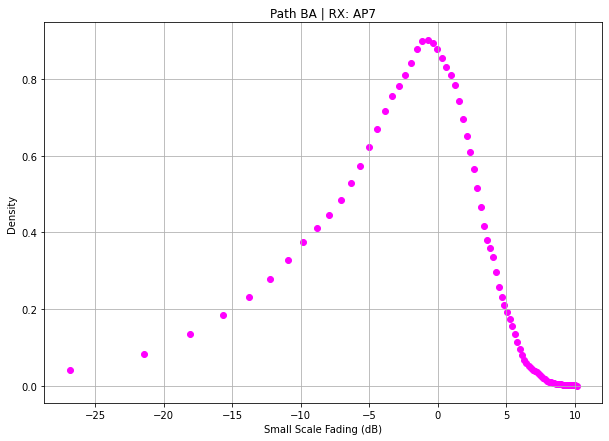

In [165]:
nAP = 'AP7'
estParameters_pathBA_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [168]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 3949)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 647)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 2609)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 255)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 48.541709184646606 seconds.

Best Fitness: 3949.194130658716
Best Gen: 178
Kappa: 1.346991420065973
Mu: 0.9879955386742422
Omega: 1.1545117649464092
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 22.63751530647278 seconds.

Best Fitness: 647.1267054602665
Best Gen: 102
Kappa: 0.7418962764178034
Mu: 1.1087188254391596
Omega: 1.2007060396160396
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 23.878228902816772 seconds.

Best Fitness: [2609.05445236]
Best Gen: 1

#### Estimated Parameters

In [169]:
mle_ku_pathBA_ap7 = [1.3334, 0.99134, 1.1553] # KappaMu MLE
mle_au_pathBA_ap7 = [2.6677, 0.85012, 1.1337] # AlphaMu MLE

estParameters_pathBA_ap7['MLE - KappaMu'] = mle_ku_pathBA_ap7
estParameters_pathBA_ap7['MLE - AlphaMu'] = mle_au_pathBA_ap7
estParameters_pathBA_ap7['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap7['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap7['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap7['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap7 = estParameters_pathBA_ap7.set_index(index)
estParameters_pathBA_ap7

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.33340,2.66770,1.346991,0.741896,2.665990,2.218995
mu,0.99134,0.85012,0.987996,1.108719,0.850784,1.087389
omega/r_hat,1.15530,1.13370,1.154512,1.200706,1.133717,1.113627


#### Plots

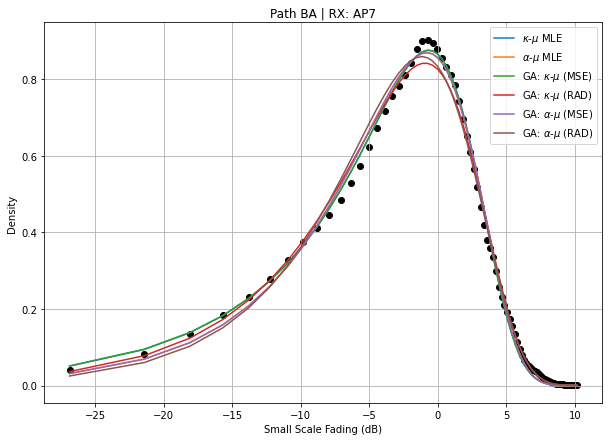

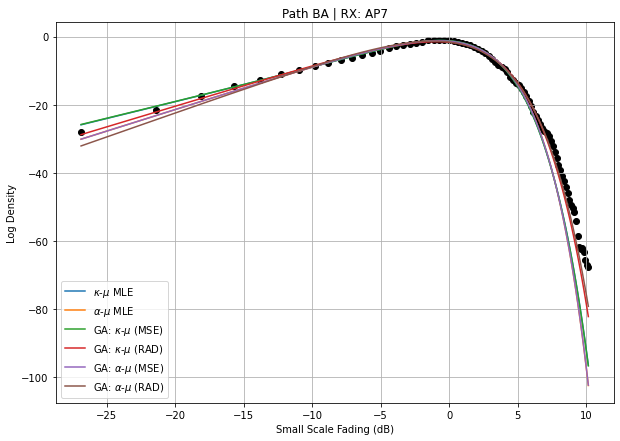

In [170]:
ku_BA_ap7_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap7[0], mle_ku_pathBA_ap7[1], mle_ku_pathBA_ap7[2]).astype(float)
au_BA_ap7_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap7[0], mle_au_pathBA_ap7[1], mle_au_pathBA_ap7[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap7_pdf,\
     au_BA_ap7_pdf,\
     estParameters_pathBA_ap7['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap7['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap7['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap7['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [171]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap7 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap7,\
                            mle_au_pathBA_ap7,\
                            estParameters_pathBA_ap7['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap7['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap7['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap7['GA: AlphaMu - RAD'])

Path: BA
RX: AP7


,Methods,Akaike Information Criteria
0,GA - AlphaMu (Fitness = RAD),25054.819724
1,GA - KappaMu (Fitness = RAD),25056.219590
2,GA - AlphaMu (Fitness = MSE),25188.959662
3,MLE - KappaMu,25190.014422
4,MLE - AlphaMu,25190.415816
5,GA - KappaMu (Fitness = MSE),25194.505284


### AP 8

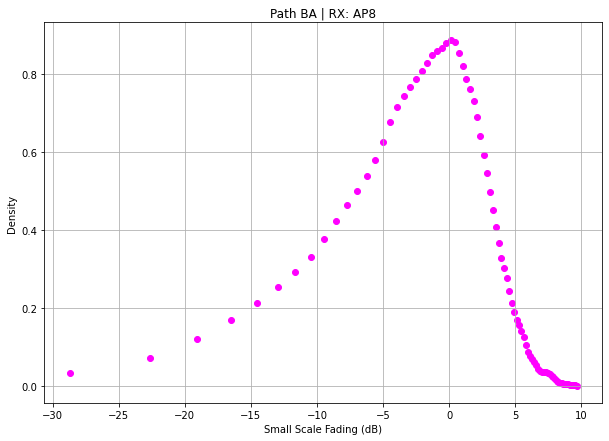

In [172]:
nAP = 'AP8'
estParameters_pathBA_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [173]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 5071)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 301)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 2991)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 68)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 32.13984251022339 seconds.

Best Fitness: 5071.049803611884
Best Gen: 115
Kappa: 1.566235884104234
Mu: 0.9387556370327901
Omega: 1.1609561595532958
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 16.821719884872437 seconds.

Best Fitness: 307.14505534871086
Best Gen: 72
Kappa: 1.5891255402185918
Mu: 0.9136673929621999
Omega: 1.2059214980566089
===========

#### Estimated Parameters

In [174]:
mle_ku_pathBA_ap8 = [1.5666, 0.9388, 1.1612] # KappaMu MLE
mle_au_pathBA_ap8 = [2.9771, 0.72971, 1.1493] # AlphaMu MLE

estParameters_pathBA_ap8['MLE - KappaMu'] = mle_ku_pathBA_ap8
estParameters_pathBA_ap8['MLE - AlphaMu'] = mle_au_pathBA_ap8
estParameters_pathBA_ap8['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap8['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap8['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap8['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap8 = estParameters_pathBA_ap8.set_index(index)
estParameters_pathBA_ap8

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,1.5666,2.97710,1.566236,1.589126,2.983844,2.909024
mu,0.9388,0.72971,0.938756,0.913667,0.726962,0.728810
omega/r_hat,1.1612,1.14930,1.160956,1.205921,1.149411,1.203415


#### Plots

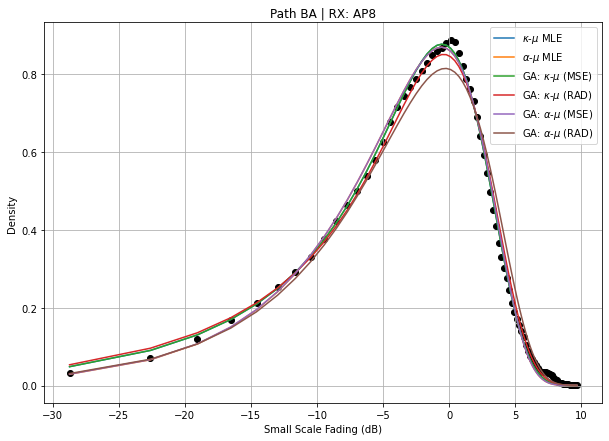

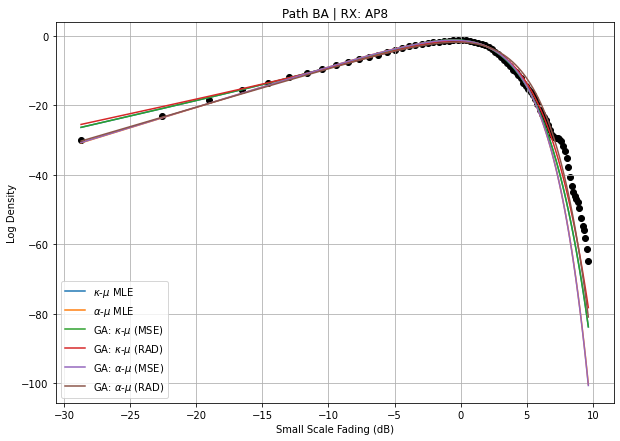

In [175]:
ku_BA_ap8_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap8[0], mle_ku_pathBA_ap8[1], mle_ku_pathBA_ap8[2]).astype(float)
au_BA_ap8_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap8[0], mle_au_pathBA_ap8[1], mle_au_pathBA_ap8[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap8_pdf,\
     au_BA_ap8_pdf,\
     estParameters_pathBA_ap8['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap8['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap8['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap8['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [176]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap8 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap8,\
                            mle_au_pathBA_ap8,\
                            estParameters_pathBA_ap8['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap8['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap8['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap8['GA: AlphaMu - RAD'])

Path: BA
RX: AP8


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),24077.701007
1,MLE - KappaMu,24127.107363
2,GA - KappaMu (Fitness = MSE),24127.460619
3,GA - AlphaMu (Fitness = RAD),24191.587239
4,MLE - AlphaMu,24290.619403
5,GA - AlphaMu (Fitness = MSE),24295.968901


### AP 9

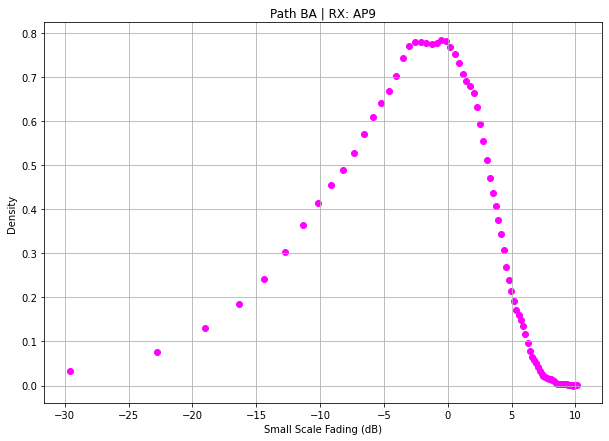

In [177]:
nAP = 'AP9'
estParameters_pathBA_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(SSF_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [181]:
print('='*30+' KAPPA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
ku_kappa_mse, ku_mu_mse, ku_omega_mse = geneticAlgorithm_ku(Xdata, Ydata, 11246)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
ku_kappa_rad, ku_mu_rad, ku_omega_rad = geneticAlgorithm_ku(Xdata, Ydata, 2672)

print('='*30+' ALPHA-MU '+'='*30)
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
au_kappa_mse, au_mu_mse, au_r_hat_mse = geneticAlgorithm_au(Xdata, Ydata, 11910)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
au_kappa_rad, au_mu_rad, au_r_hat_rad = geneticAlgorithm_au(Xdata, Ydata, 300)

============================== KAPPA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Satisfactory Threshold reached!
Elapsed time is 17.98633909225464 seconds.

Best Fitness: 11246.143887732538
Best Gen: 70
Kappa: 0.7763745647384911
Mu: 1.0075059039656293
Omega: 1.2306563585259422
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 23.20792269706726 seconds.

Best Fitness: 2672.260031099578
Best Gen: 107
Kappa: 0.6879519598066749
Mu: 1.0383725330648579
Omega: 1.2296264852195127
============================== ALPHA-MU ==============================
Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 9.568072080612183 seconds.

Best Fitness: [11910.32593654]
Best Gen: 4

#### Estimated Parameters

In [182]:
mle_ku_pathBA_ap9 = [0.77596, 1.0077, 1.2309] # KappaMu MLE
mle_au_pathBA_ap9 = [2.5837, 0.77709, 1.1606] # AlphaMu MLE

estParameters_pathBA_ap9['MLE - KappaMu'] = mle_ku_pathBA_ap9
estParameters_pathBA_ap9['MLE - AlphaMu'] = mle_au_pathBA_ap9
estParameters_pathBA_ap9['GA: KappaMu - MSE'] = ku_kappa_mse, ku_mu_mse, ku_omega_mse
estParameters_pathBA_ap9['GA: KappaMu - RAD'] = ku_kappa_rad, ku_mu_rad, ku_omega_rad
estParameters_pathBA_ap9['GA: AlphaMu - MSE'] = au_kappa_mse, au_mu_mse, au_r_hat_mse
estParameters_pathBA_ap9['GA: AlphaMu - RAD'] = au_kappa_rad, au_mu_rad, au_r_hat_rad

index = pd.Index(['kappa', 'mu', 'omega/r_hat'])
estParameters_pathBA_ap9 = estParameters_pathBA_ap9.set_index(index)
estParameters_pathBA_ap9

,MLE - KappaMu,MLE - AlphaMu,GA: KappaMu - MSE,GA: KappaMu - RAD,GA: AlphaMu - MSE,GA: AlphaMu - RAD
kappa,0.77596,2.58370,0.776375,0.687952,2.580057,2.213311
mu,1.00770,0.77709,1.007506,1.038373,0.778827,1.079530
omega/r_hat,1.23090,1.16060,1.230656,1.229626,1.160418,1.124416


#### Plots

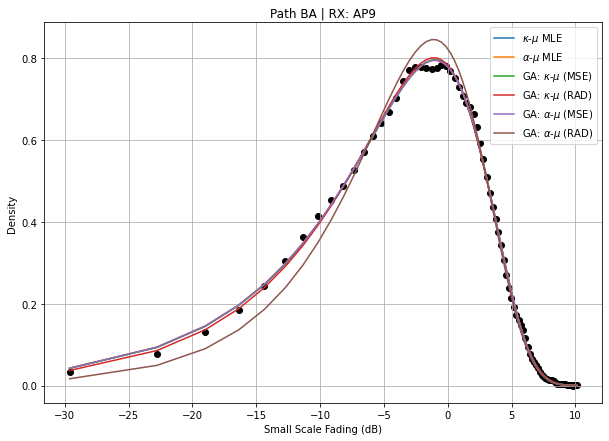

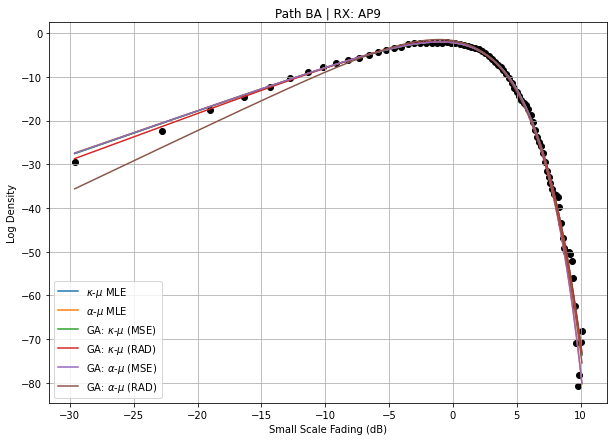

In [183]:
ku_BA_ap9_pdf = KappaMuPDF(Xdata, mle_ku_pathBA_ap9[0], mle_ku_pathBA_ap9[1], mle_ku_pathBA_ap9[2]).astype(float)
au_BA_ap9_pdf = AlphaMuPDF(Xdata, mle_au_pathBA_ap9[0], mle_au_pathBA_ap9[1], mle_au_pathBA_ap9[2]).astype(float)

plotResults(Xdata,\
     Ydata,\
     ku_BA_ap9_pdf,\
     au_BA_ap9_pdf,\
     estParameters_pathBA_ap9['GA: KappaMu - MSE'],\
     estParameters_pathBA_ap9['GA: KappaMu - RAD'],\
     estParameters_pathBA_ap9['GA: AlphaMu - MSE'],\
     estParameters_pathBA_ap9['GA: AlphaMu - RAD'],\
     path,\
     nAP)

#### AIC Values

In [184]:
## AIC Analysis
data = SSF_pathBA_linear[nAP].dropna()
n = len(data)
K = 3

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap9 = computeAIC(data, n, K,\
                            mle_ku_pathBA_ap9,\
                            mle_au_pathBA_ap9,\
                            estParameters_pathBA_ap9['GA: KappaMu - MSE'],\
                            estParameters_pathBA_ap9['GA: KappaMu - RAD'],\
                            estParameters_pathBA_ap9['GA: AlphaMu - MSE'],\
                            estParameters_pathBA_ap9['GA: AlphaMu - RAD'])

Path: BA
RX: AP9


,Methods,Akaike Information Criteria
0,GA - KappaMu (Fitness = RAD),26020.637305
1,MLE - KappaMu,26031.113540
2,GA - KappaMu (Fitness = MSE),26031.165515
3,GA - AlphaMu (Fitness = MSE),26036.507372
4,MLE - AlphaMu,26037.119766
5,GA - AlphaMu (Fitness = RAD),26106.943673
